Dataset Overview:
--------------------------------------------------
Number of Rows: 736
Number of Columns: 33

Column Names: ['Timestamp', 'Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions']

Data Types:
 Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                     

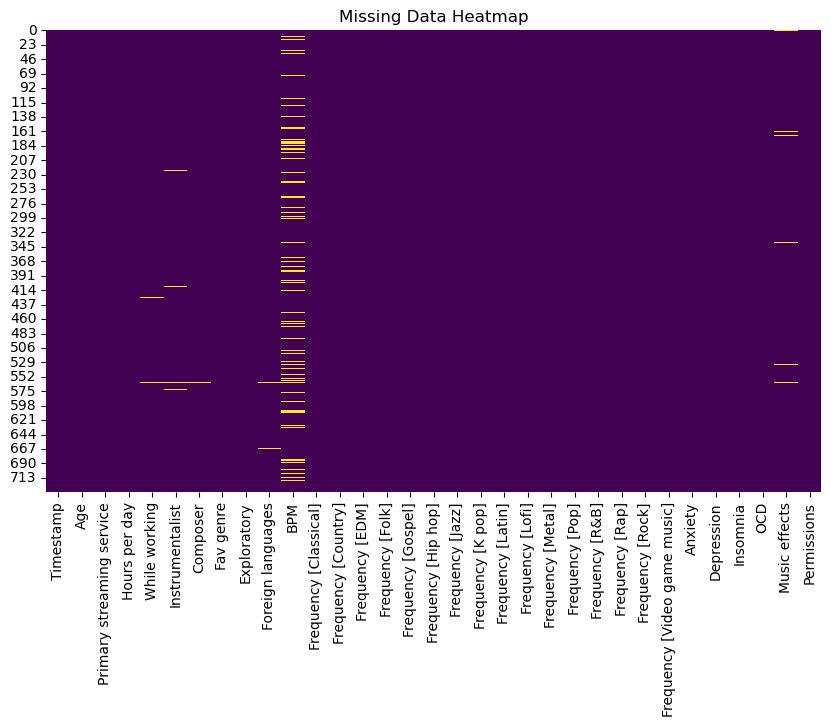

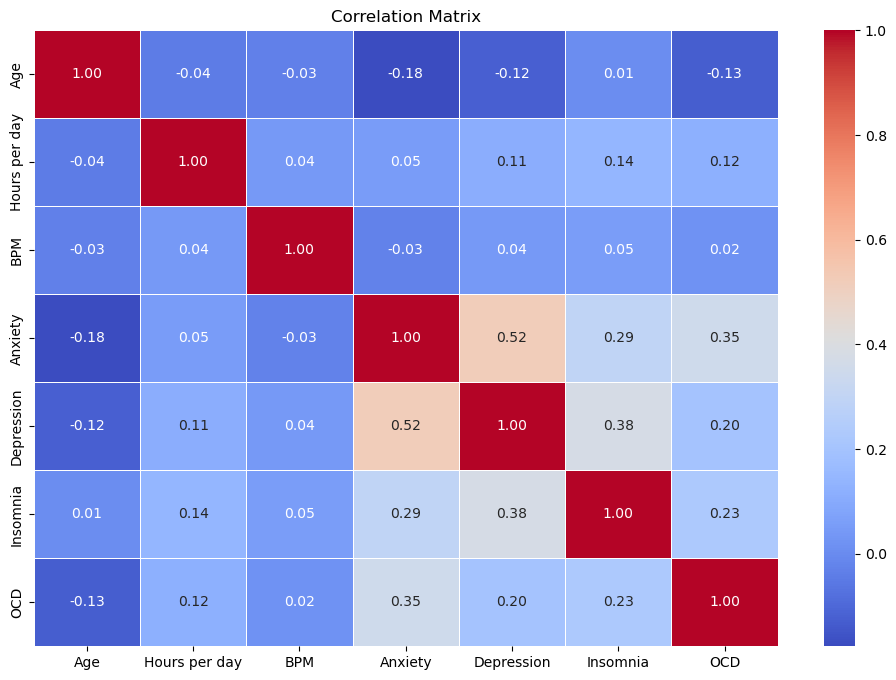

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = ""  # Update path if needed
df = pd.read_csv(file_path)


def dataset_overview(df):
    print("Dataset Overview:")
    print("-" * 50)
    
    # Shape of the dataset
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}\n")
    
    # Display column names
    print(f"Column Names: {list(df.columns)}\n")
    
    # Display data types of each column
    print("Data Types:\n", df.dtypes)
    print("\n")
    
    # Display missing values
    print("Missing Values:\n", df.isnull().sum())
    
# Display the first few rows of the dataset
def display_head(df):
    print("\nFirst 5 Rows of the Dataset:")
    print("-" * 50)
    print(df.head())

# Summary statistics for numerical columns
def summary_statistics(df):
    print("\nSummary Statistics for Numerical Columns:")
    print("-" * 50)
    print(df.describe())

# Function to analyze categorical columns
def categorical_analysis(df):
    print("\nCategorical Column Overview:")
    print("-" * 50)
    cat_columns = df.select_dtypes(include=['object']).columns
    for col in cat_columns:
        print(f"{col}: {df[col].nunique()} unique values")
        print(df[col].value_counts().head(5))  # Show top 5 unique values
        print("-" * 20)

# Visualize missing data
def visualize_missing_data(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()

# Visualize correlation matrix for numerical columns
def correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

# Main function to run the analysis
def dataset_analysis(df):
    dataset_overview(df)
    display_head(df)
    summary_statistics(df)
    categorical_analysis(df)
    visualize_missing_data(df)
    correlation_matrix(df)

# Run the analysis
dataset_analysis(df)


In [3]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

# Check for NULL/NaN values
null_values = df.isnull().sum()
print("Number of NULL/NaN values in each column:")
print(null_values[null_values > 0])

Number of duplicate entries: 0
Number of NULL/NaN values in each column:
Age                          1
Primary streaming service    1
While working                3
Instrumentalist              4
Composer                     1
Foreign languages            4
Music effects                8
dtype: int64


In [4]:
# Replace NULL values in 'bpm' column with the median
median_bpm = df['BPM'].median()
df['BPM'].fillna(median_bpm, inplace=True)

# Check to ensure there are no more NULL values in 'bpm'
print("NULL values in 'bpm' after replacement:", df['BPM'].isnull().sum())


NULL values in 'bpm' after replacement: 0


In [5]:
# Replace NULL values in numerical columns with their median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Replace NULL values in categorical columns with their mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for remaining NULL values
null_counts = df.isnull().sum()
print("Remaining NULL values in each column:\n", null_counts)

Remaining NULL values in each column:
 Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depressio

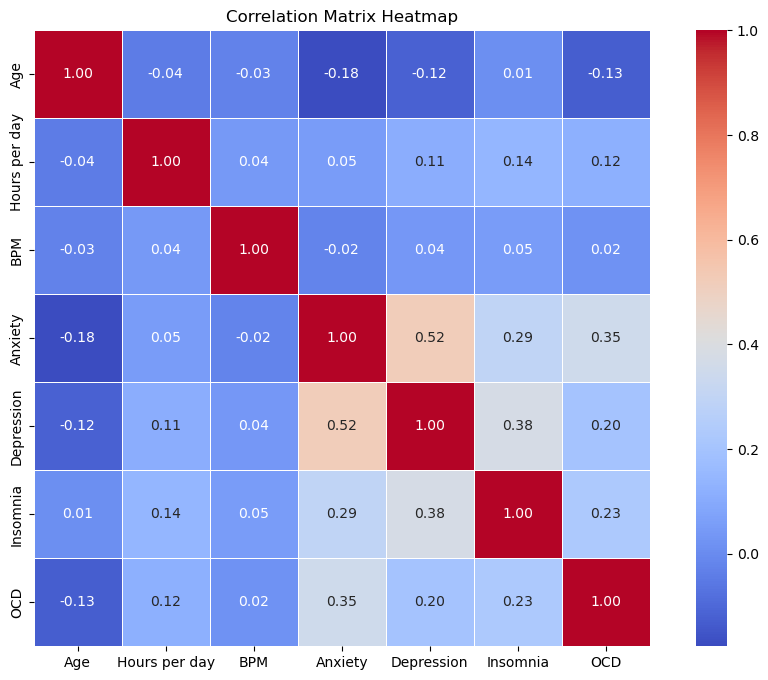

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

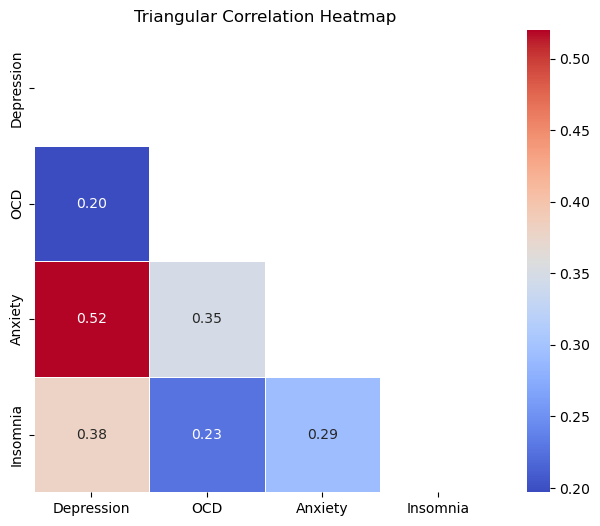

In [7]:
# Select the relevant columns for the correlation matrix
cols_of_interest = ['Depression', 'OCD', 'Anxiety', 'Insomnia']
correlation_matrix = df[cols_of_interest].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a triangular heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Set title
plt.title('Triangular Correlation Heatmap')

# Show the plot
plt.show()

In [8]:
# Find unique values in each column of the DataFrame
unique_values = {col: df[col].unique() for col in df.columns}

# Display unique values
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'Timestamp': ['8/27/2022 19:29:02' '8/27/2022 19:57:31' '8/27/2022 21:28:18'
 '8/27/2022 21:40:40' '8/27/2022 21:54:47' '8/27/2022 21:56:50'
 '8/27/2022 22:00:29' '8/27/2022 22:18:59' '8/27/2022 22:33:05'
 '8/27/2022 22:44:03' '8/27/2022 22:51:15' '8/27/2022 23:00:32'
 '8/27/2022 23:04:00' '8/27/2022 23:12:03' '8/27/2022 23:16:06'
 '8/27/2022 23:19:52' '8/27/2022 23:39:41' '8/27/2022 23:39:49'
 '8/27/2022 23:40:55' '8/27/2022 23:41:36' '8/27/2022 23:43:06'
 '8/28/2022 0:28:02' '8/28/2022 1:39:02' '8/28/2022 3:19:08'
 '8/28/2022 4:13:11' '8/28/2022 4:38:14' '8/28/2022 4:40:36'
 '8/28/2022 5:05:51' '8/28/2022 5:16:30' '8/28/2022 8:36:27'
 '8/28/2022 10:30:22' '8/28/2022 10:38:05' '8/28/2022 10:54:30'
 '8/28/2022 10:59:53' '8/28/2022 11:08:51' '8/28/2022 11:13:25'
 '8/28/2022 11:25:49' '8/28/2022 11:27:15' '8/28/2022 11:36:35'
 '8/28/2022 11:39:21' '8/28/2022 11:50:31' '8/28/2022 11:54:45'
 '8/28/2022 11:55:54' '8/28/2022 11:58:48' '8/28/2022 12:08:29'
 '8/28/2022 12:12:3

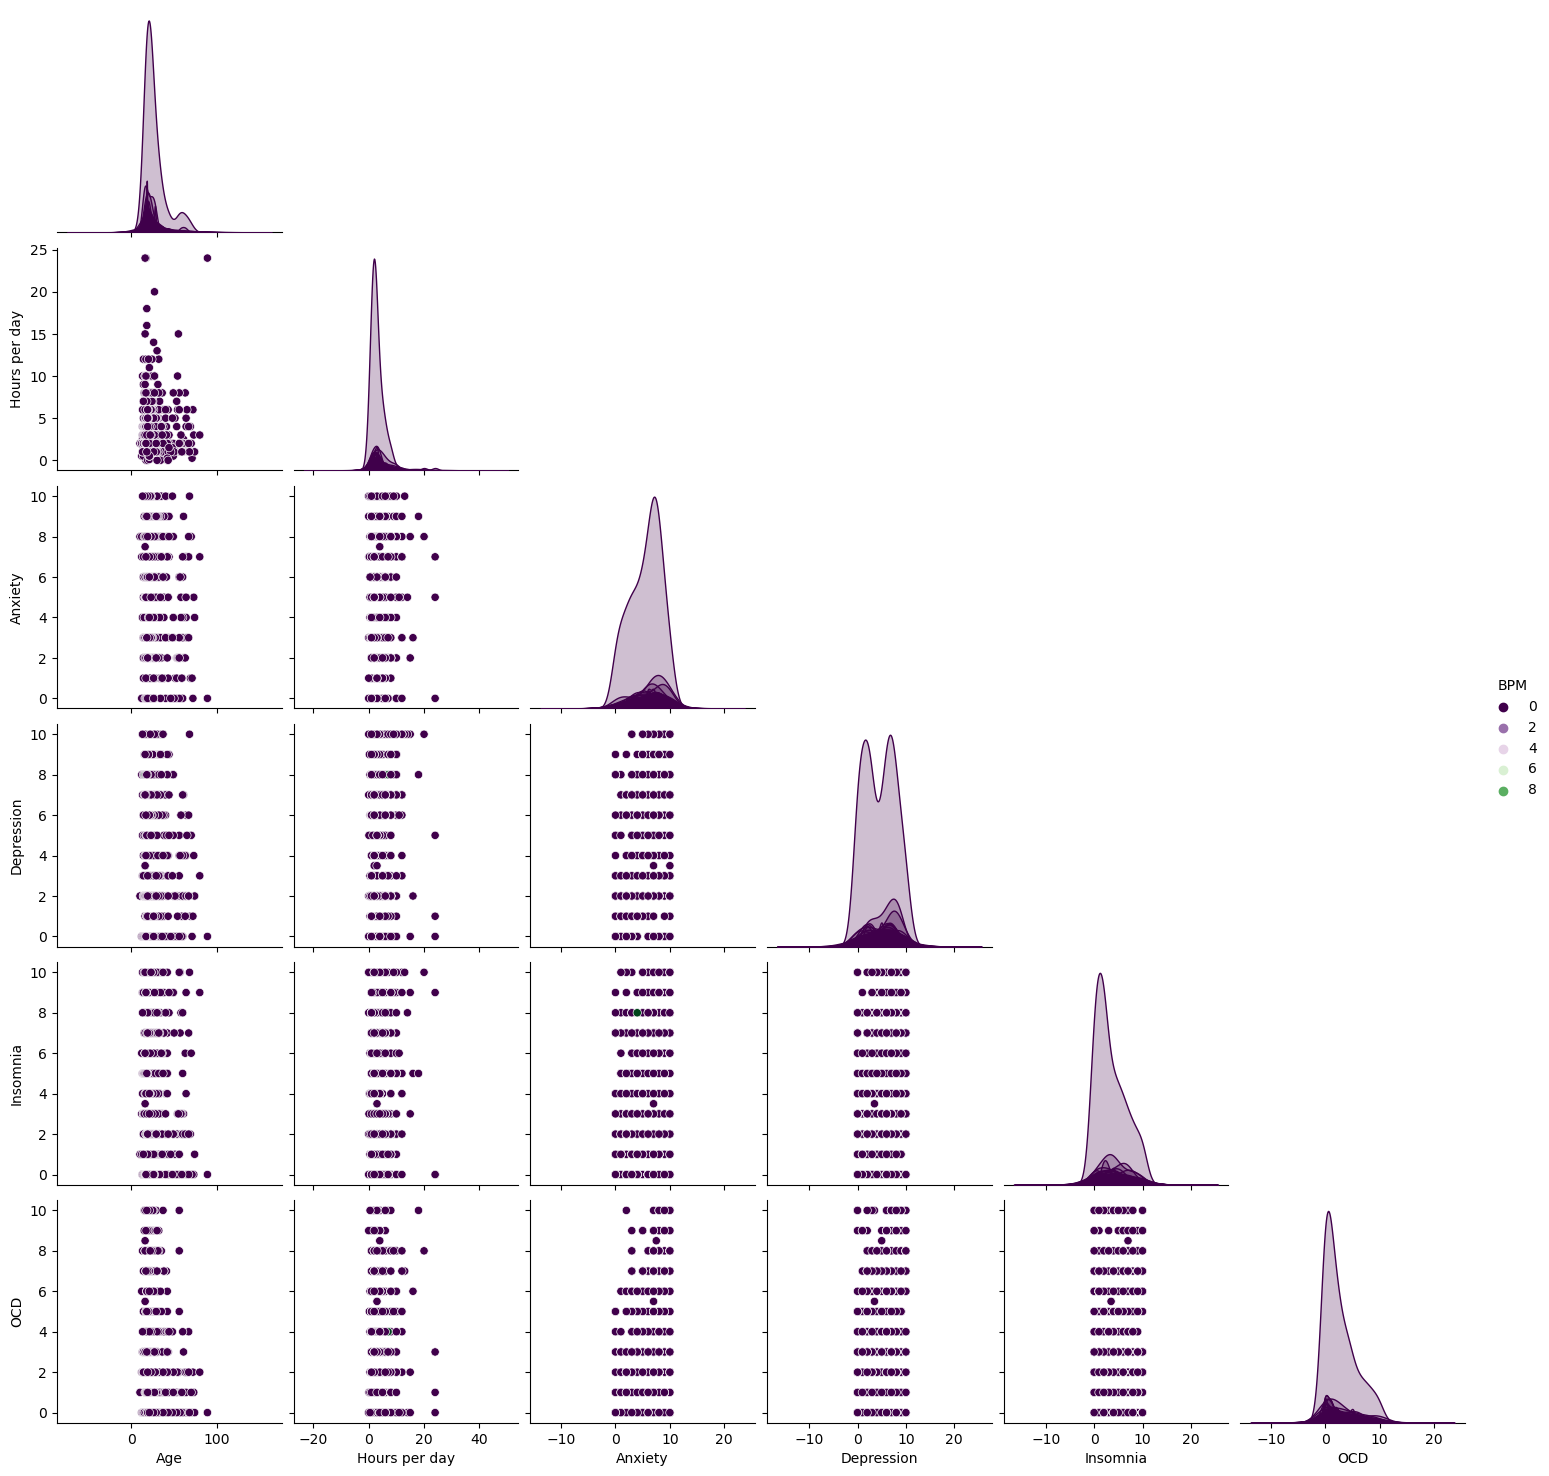

In [9]:
sns.pairplot(data=df, diag_kind='kde',hue="BPM",palette='PRGn',corner=True)
plt.show()

In [11]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [12]:
# Example of binary encoding for Yes/No columns
binary_columns = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'Permissions']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for frequency columns
frequency_columns = [col for col in df.columns if 'Frequency [' in col]
df = pd.get_dummies(df, columns=frequency_columns, drop_first=True)

# Check the transformed DataFrame
print(df.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

   While working  Instrumentalist  Composer         Fav genre  Exploratory  \
0              1                1         1             Latin            1   
1              1                0         0              Rock            1   
2              0                0         0  Video game music            0   
3              1                0         1              Jazz            1   
4              1                0         0               R&B            1   

   Foreign languages  ...  Frequency [R&B]_Very frequently  \
0                  1  ...           

In [13]:
df.dtypes

Timestamp                                        object
Age                                             float64
Primary streaming service                        object
Hours per day                                   float64
While working                                     int64
                                                 ...   
Frequency [Rock]_Sometimes                        uint8
Frequency [Rock]_Very frequently                  uint8
Frequency [Video game music]_Rarely               uint8
Frequency [Video game music]_Sometimes            uint8
Frequency [Video game music]_Very frequently      uint8
Length: 65, dtype: object

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")
sns.set(color_codes = True)   
sns.set_palette(palette = 'mako', n_colors = 8)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
fig = px.scatter_3d(df, x='Insomnia', y='Anxiety', z='Depression', color='Age', color_continuous_scale="plasma", template = 'plotly_white')
fig.update_traces(marker=dict(size=5))
fig.show()

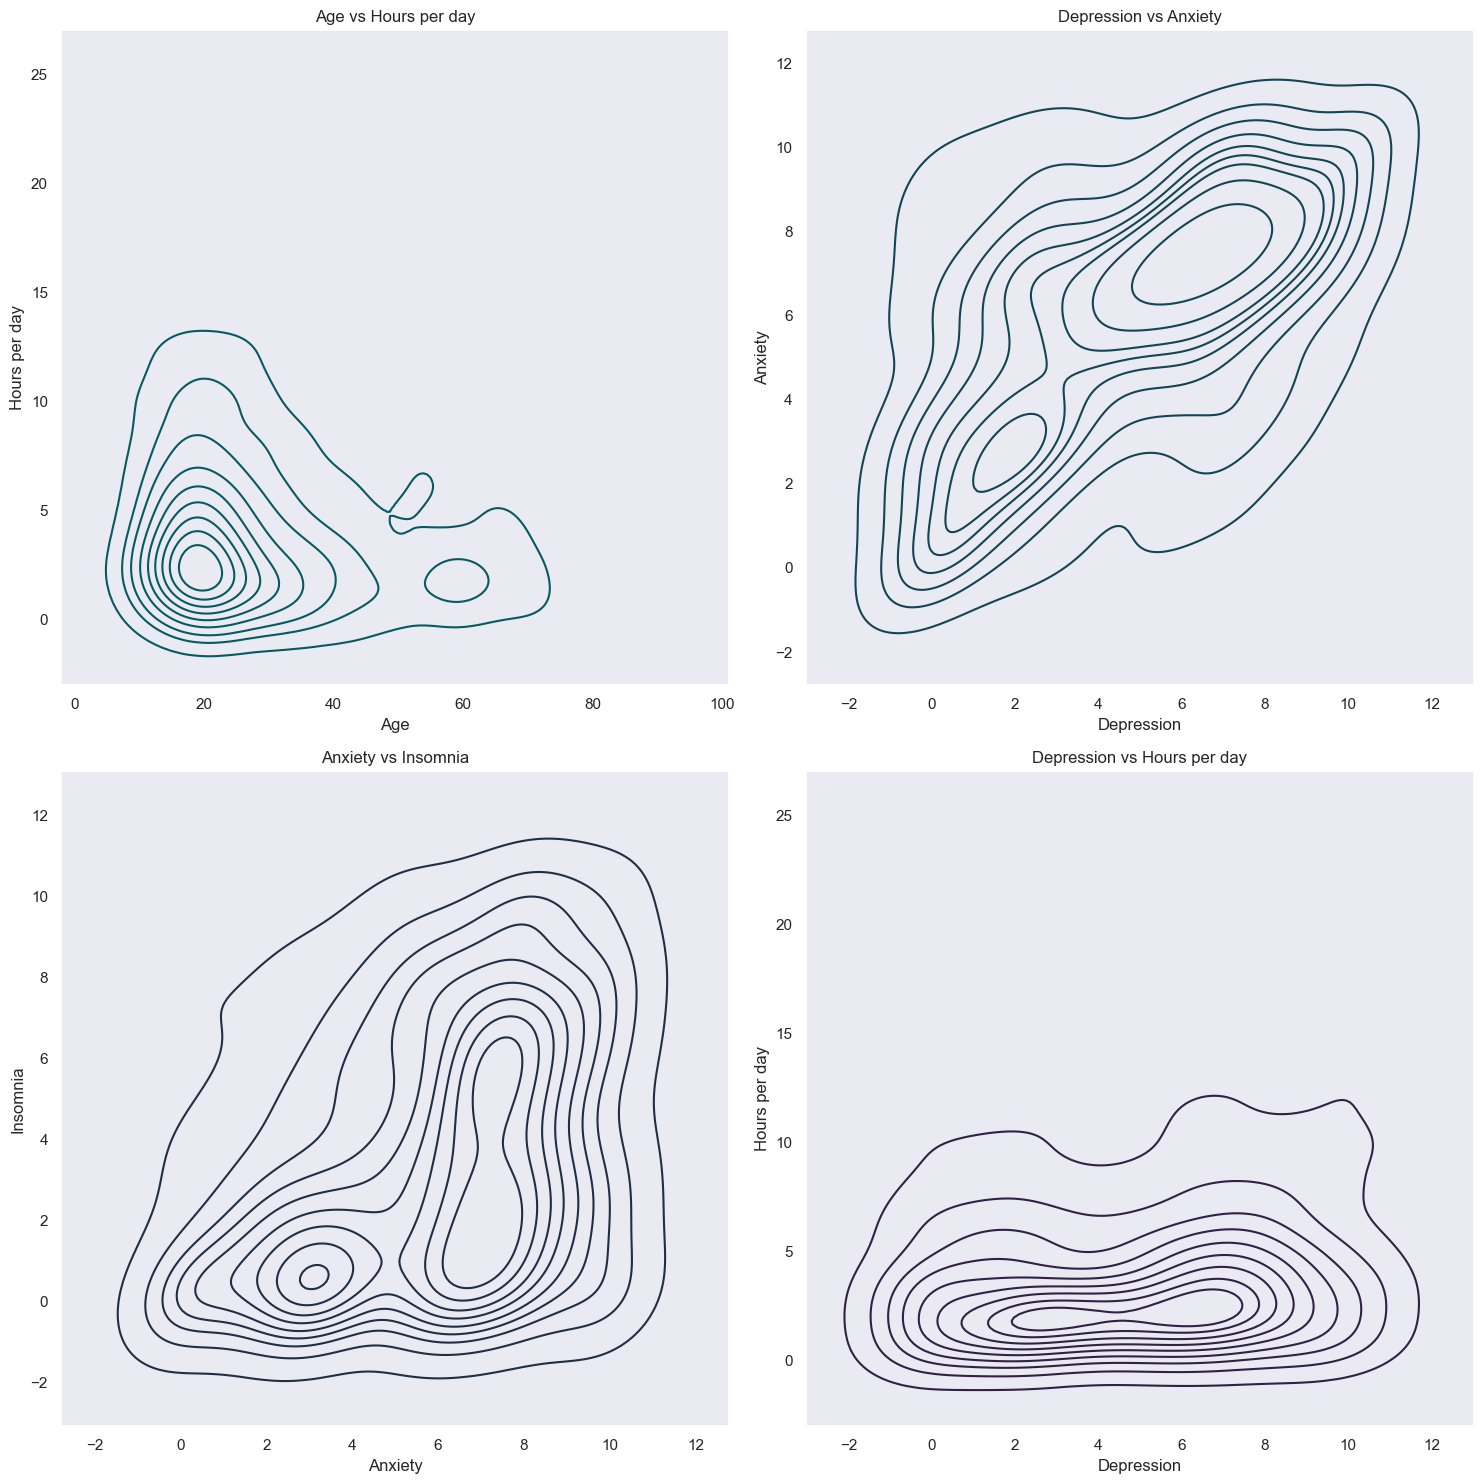

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.kdeplot(x='Age', y='Hours per day', data=df, ax=axs[0, 0], color='#065A60')
axs[0, 0].set_title('Age vs Hours per day')
axs[0, 0].grid()
sns.kdeplot(x='Depression', y='Anxiety', data=df, ax=axs[0, 1], color='#144552')
axs[0, 1].set_title('Depression vs Anxiety')
axs[0, 1].grid()
sns.kdeplot(x='Anxiety', y='Insomnia', data=df, ax=axs[1, 0], color='#212F45')
axs[1, 0].set_title('Anxiety vs Insomnia')
axs[1, 0].grid()
sns.kdeplot(x='Depression', y='Hours per day', data=df, ax=axs[1, 1], color='#312244')
axs[1, 1].set_title('Depression vs Hours per day')
axs[1, 1].grid()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='OCD', ylabel='Density'>

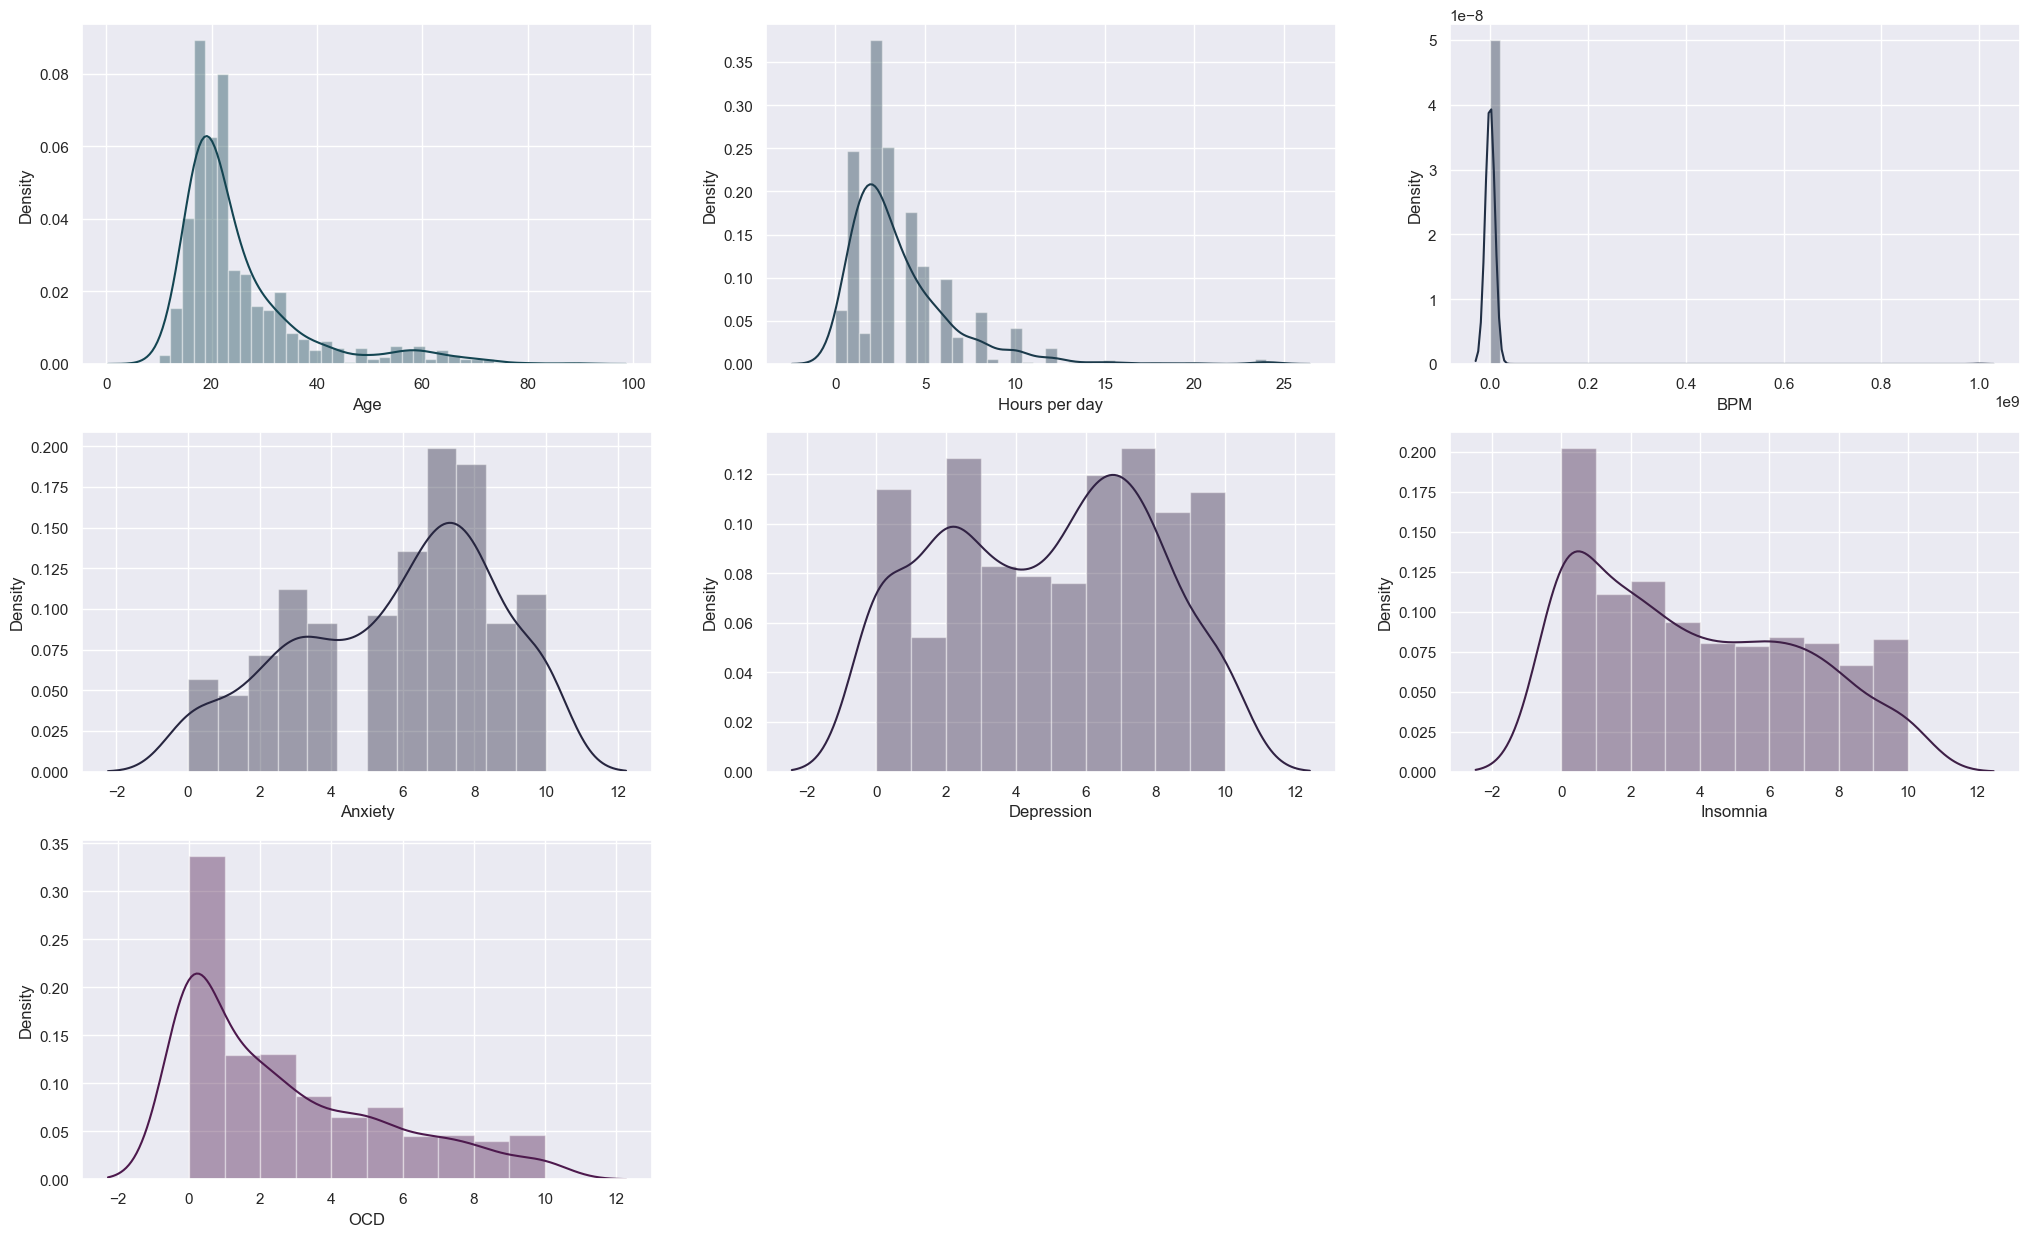

In [16]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.distplot(df['Age'],kde=True,color='#144552')
plt.subplot(3,3,2)
sns.distplot(df['Hours per day'],kde=True,color='#1B3A4B')
plt.subplot(3,3,3)
sns.distplot(df['BPM'],kde=True,color='#212F45')
plt.subplot(3,3,4)
sns.distplot(df['Anxiety'],kde=True,color='#272640')
plt.subplot(3,3,5)
sns.distplot(df['Depression'],kde=True,color='#312244')
plt.subplot(3,3,6)
sns.distplot(df['Insomnia'],kde=True,color='#3E1F47')
plt.subplot(3,3,7)
sns.distplot(df['OCD'],kde=True,color='#4D194D')

In [17]:
df1 = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']

In [18]:
# measure of skewness
df[df1].skew(axis = 0, skipna = True) 

Age               2.127202
Hours per day     2.532543
BPM              27.129320
Anxiety          -0.421350
Depression       -0.048449
Insomnia          0.416455
OCD               0.954291
dtype: float64

In [19]:
# Step 1: Identify Outliers using the IQR method
Q1 = df['Hours per day'].quantile(0.25)
Q3 = df['Hours per day'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Hours per day'] < lower_bound) | (df['Hours per day'] > upper_bound)]
non_outliers = df[(df['Hours per day'] >= lower_bound) & (df['Hours per day'] <= upper_bound)]

# Step 2: Calculate Average Mental Health Scores
mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']  # Include your mental health columns here

outlier_averages = outliers[mental_health_columns].mean()
non_outlier_averages = non_outliers[mental_health_columns].mean()

# Step 3: Create a Summary DataFrame for Comparison
summary_df = pd.DataFrame({
    'Outliers Average': outlier_averages,
    'Non-Outliers Average': non_outlier_averages
})

print(summary_df)

            Outliers Average  Non-Outliers Average
Anxiety                6.125              5.821121
Depression             6.050              4.724138
Insomnia               4.800              3.677443
OCD                    3.400              2.593391


In [20]:
from scipy import stats

# Perform t-tests
anxiety_ttest = stats.ttest_ind(outliers['Anxiety'], non_outliers['Anxiety'])
depression_ttest = stats.ttest_ind(outliers['Depression'], non_outliers['Depression'])
insomnia_ttest = stats.ttest_ind(outliers['Insomnia'], non_outliers['Insomnia'])
ocd_ttest = stats.ttest_ind(outliers['OCD'], non_outliers['OCD'])

print("Anxiety T-Test:", anxiety_ttest)
print("Depression T-Test:", depression_ttest)
print("Insomnia T-Test:", insomnia_ttest)
print("OCD T-Test:", ocd_ttest)


Anxiety T-Test: Ttest_indResult(statistic=0.6688891086175214, pvalue=0.5037765319961485)
Depression T-Test: Ttest_indResult(statistic=2.703770272428611, pvalue=0.007014470216433492)
Insomnia T-Test: Ttest_indResult(statistic=2.24138049249036, pvalue=0.025299553572500574)
OCD T-Test: Ttest_indResult(statistic=1.7479886450826068, pvalue=0.0808841020144863)


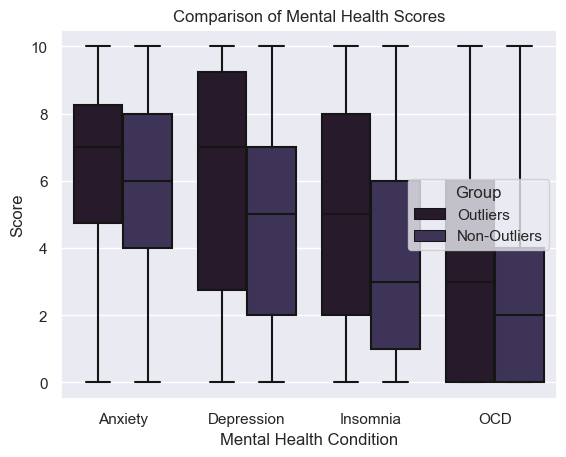

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the data for visualization
outliers['Group'] = 'Outliers'
non_outliers['Group'] = 'Non-Outliers'
combined = pd.concat([outliers[mental_health_columns + ['Group']], non_outliers[mental_health_columns + ['Group']]])

# Create a box plot
sns.boxplot(data=combined.melt(id_vars='Group'), x='variable', y='value', hue='Group')
plt.title('Comparison of Mental Health Scores')
plt.xlabel('Mental Health Condition')
plt.ylabel('Score')
plt.legend(title='Group')
plt.show()


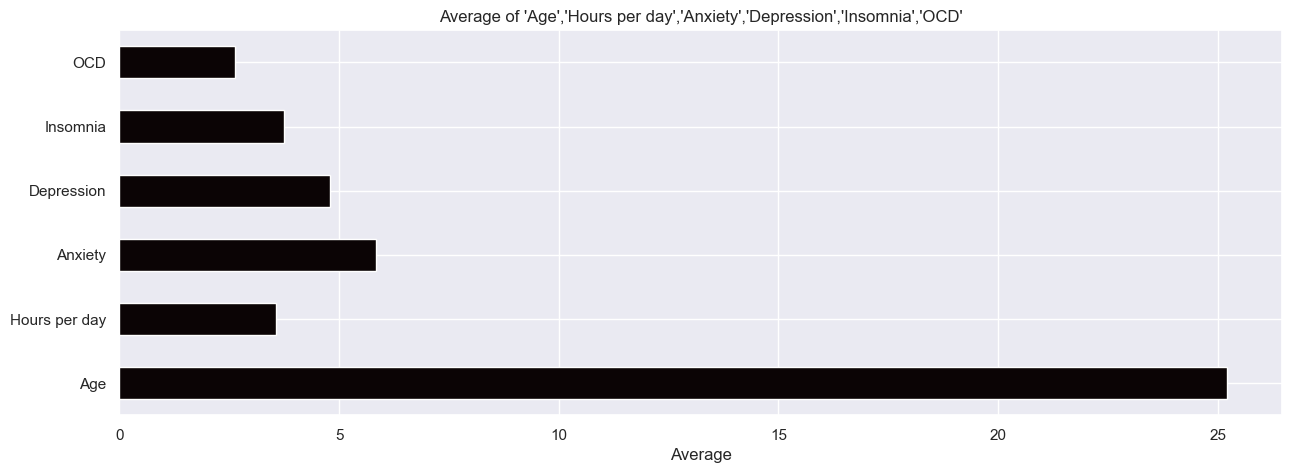

In [22]:
df2 = ['Age','Hours per day','Anxiety','Depression','Insomnia','OCD']
df_mean = df[df2].mean()
df_mean.plot(kind='barh', stacked=True, figsize=(15, 5), cmap="mako")
plt.xlabel('Average')
plt.title("Average of 'Age','Hours per day','Anxiety','Depression','Insomnia','OCD'")
plt.show()

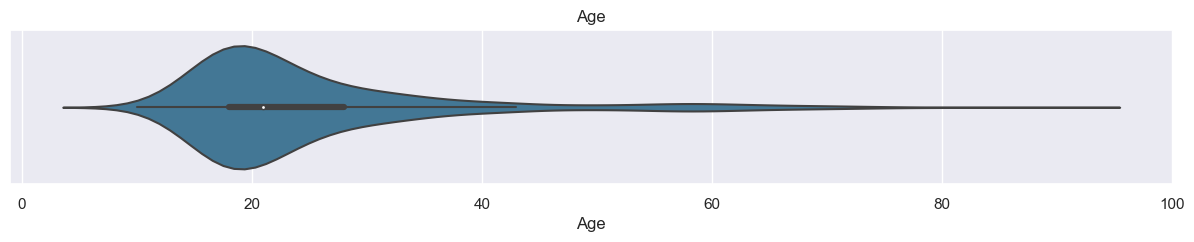

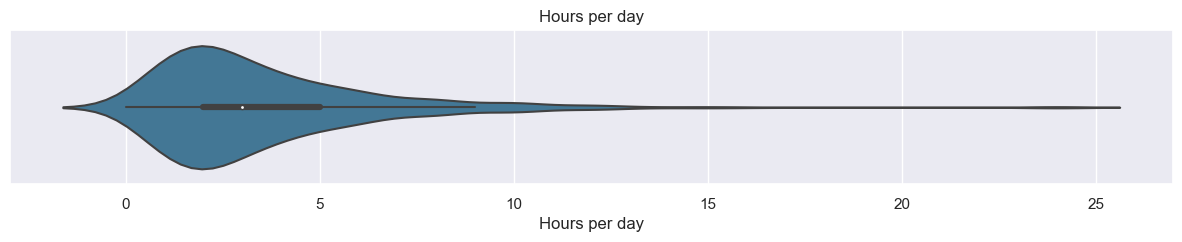

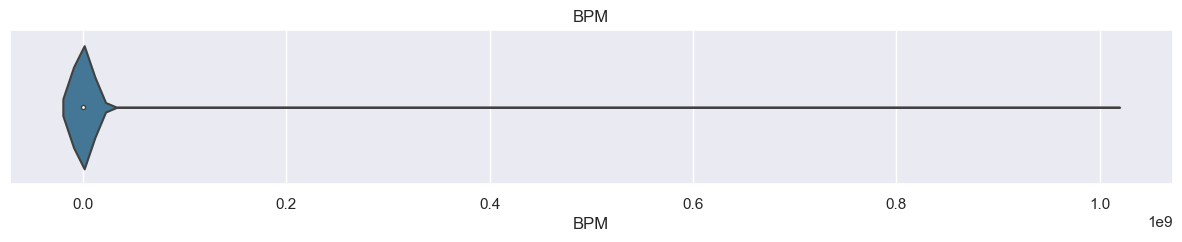

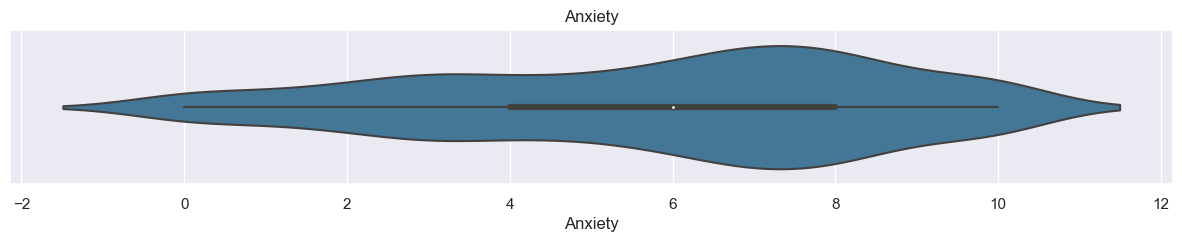

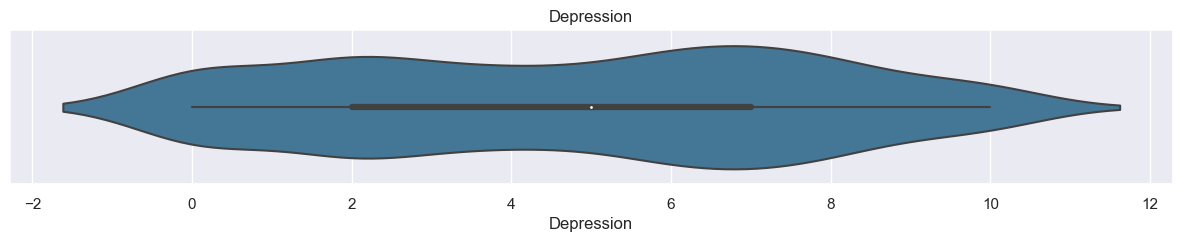

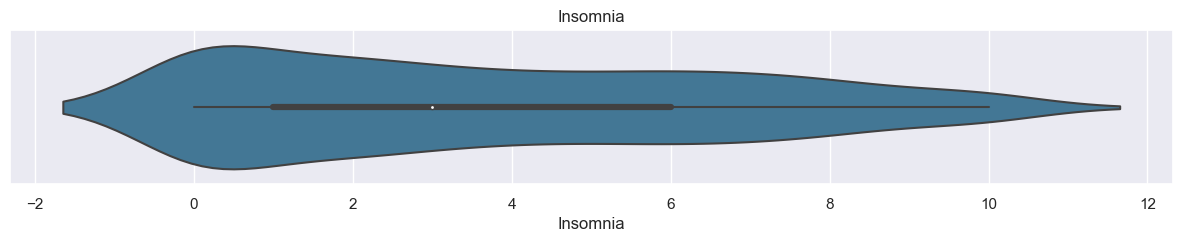

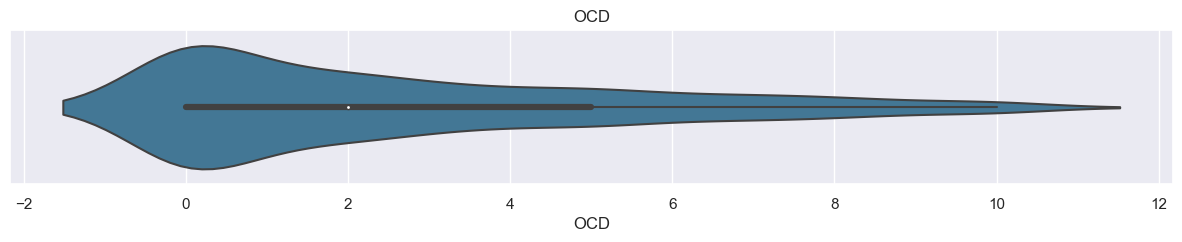

In [23]:
columns1 = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
palette ="mako"
for column in columns1:
    plt.figure(figsize=(15,2))
    sns.violinplot(x=df[column], palette=palette)
    plt.title(column)
    plt.show()


Age Statistics:
count: 736.00, mean: 25.20, std: 12.05, min: 10.00, 25%: 18.00, 50%: 21.00, 75%: 28.00, max: 89.00


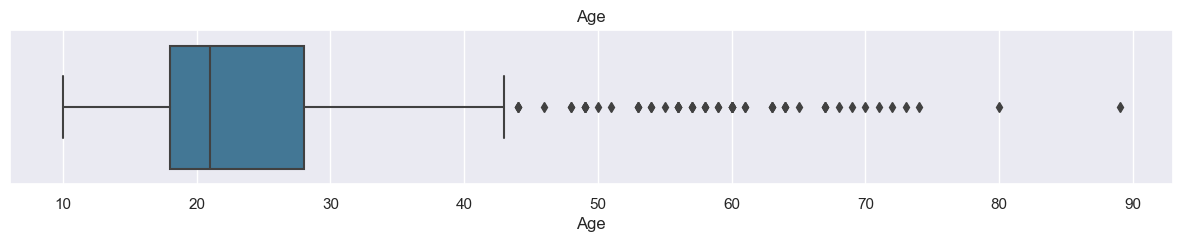


Hours per day Statistics:
count: 736.00, mean: 3.57, std: 3.03, min: 0.00, 25%: 2.00, 50%: 3.00, 75%: 5.00, max: 24.00


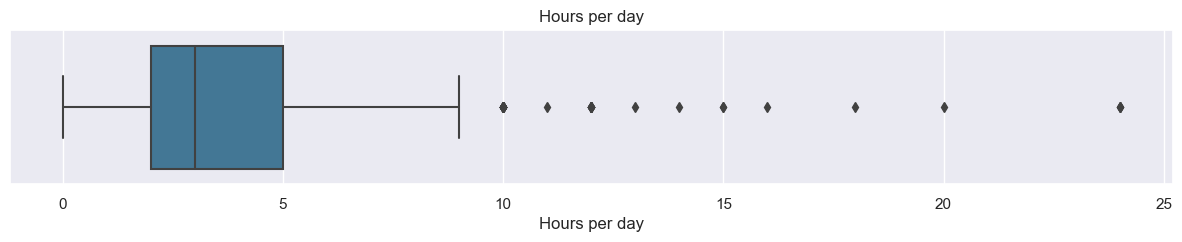


BPM Statistics:
count: 736.00, mean: 1358818.41, std: 36860484.47, min: 0.00, 25%: 105.00, 50%: 120.00, 75%: 140.00, max: 999999999.00


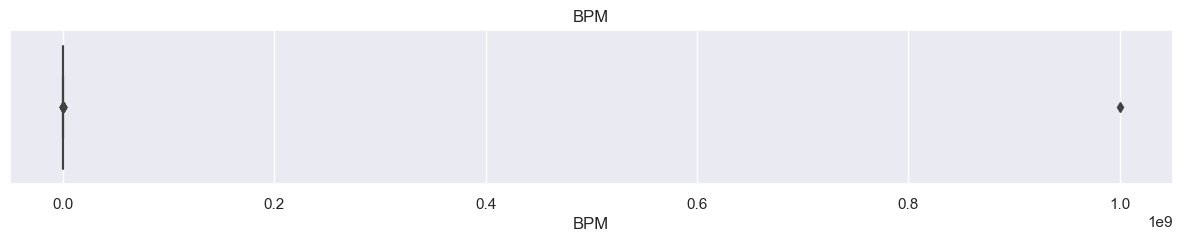


Anxiety Statistics:
count: 736.00, mean: 5.84, std: 2.79, min: 0.00, 25%: 4.00, 50%: 6.00, 75%: 8.00, max: 10.00


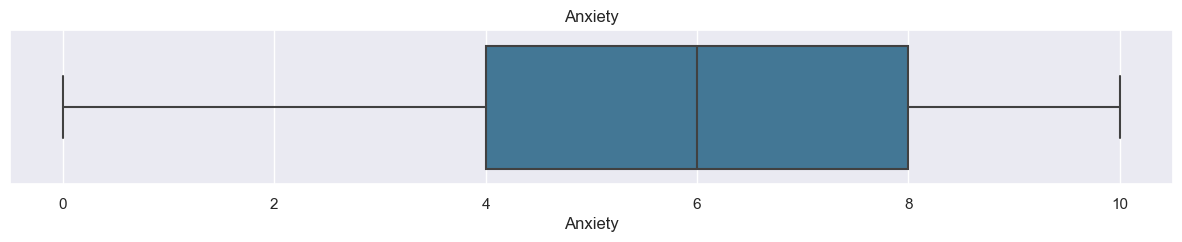


Depression Statistics:
count: 736.00, mean: 4.80, std: 3.03, min: 0.00, 25%: 2.00, 50%: 5.00, 75%: 7.00, max: 10.00


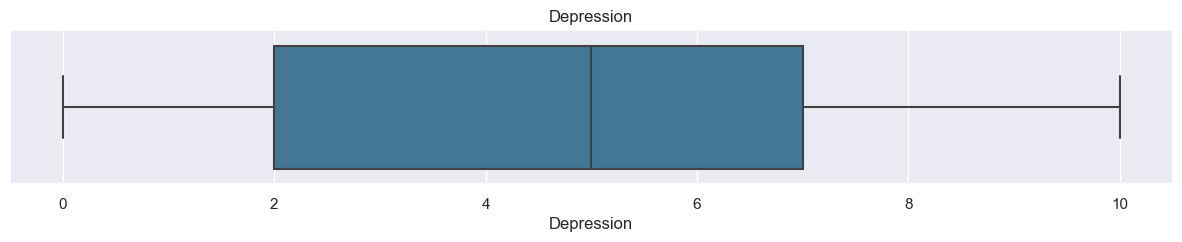


Insomnia Statistics:
count: 736.00, mean: 3.74, std: 3.09, min: 0.00, 25%: 1.00, 50%: 3.00, 75%: 6.00, max: 10.00


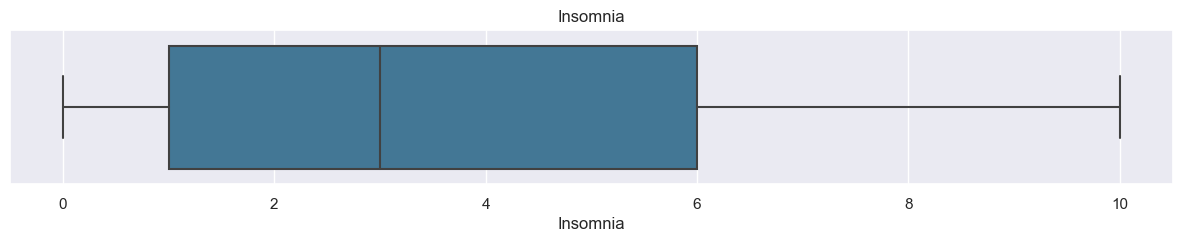


OCD Statistics:
count: 736.00, mean: 2.64, std: 2.84, min: 0.00, 25%: 0.00, 50%: 2.00, 75%: 5.00, max: 10.00


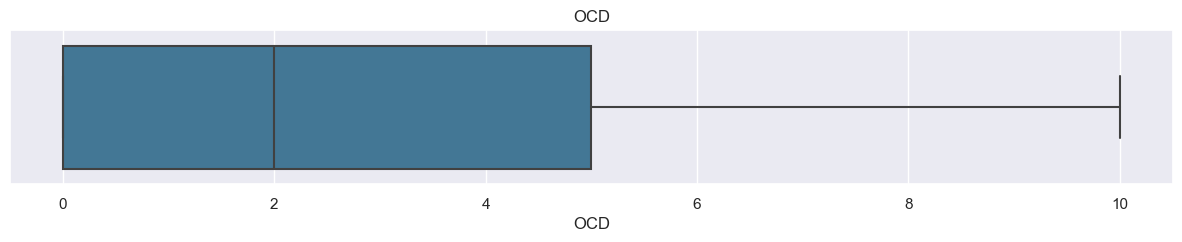

In [24]:
palette ="mako"
for column in columns1:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(column)
    stats = df[column].describe()
    stats_text = ", ".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}")
    plt.show()

In [25]:
feature_list = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
def StDev_method (df,n,features):
    outliers = []
    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        cut_off = data_std * 3     
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outliers.extend(outlier_list_column)
    outliers = Counter(outliers)        
    OUT= list( k for k, v in outliers.items() if v > n )
    df1 = df[df[column] > data_mean + cut_off]
    df2 = df[df[column] < data_mean - cut_off]
    print('Total number of outliers is:', df1.shape[0]+ df2.shape[0])
    
    return OUT  
Outliers_StDev = StDev_method(df,1,feature_list)
df_out2 = df.drop(Outliers_StDev, axis = 0).reset_index(drop=True)

Total number of outliers is: 0


In [26]:
# Removing useless columns
dff = df.drop(['Timestamp', 'Permissions'], axis=1)

In [27]:
# Renaming frequency columns to only the name of the musical genre
dff = (dff.rename(columns={
    'Frequency [Classical]': 'Classical',          
    'Frequency [Country]': 'Country',               
    'Frequency [EDM]': 'EDM',                  
    'Frequency [Folk]': 'Folk',                  
    'Frequency [Gospel]': 'Gospel',                
    'Frequency [Hip hop]': 'Hip hop',               
    'Frequency [Jazz]': 'Jazz',                  
    'Frequency [K pop]': 'K pop',                 
    'Frequency [Latin]': 'Latin',                 
    'Frequency [Lofi]': 'Lofi',                  
    'Frequency [Metal]': 'Metal',                 
    'Frequency [Pop]': 'Pop',                   
    'Frequency [R&B]': 'R&B',                  
    'Frequency [Rap]': 'Rap',               
    'Frequency [Rock]': 'Rock',                 
    'Frequency [Video game music]': 'Games music'      }))

In [28]:
print(f'Minimum age: {dff["Age"].min()}')
print(f'Maximum age: {dff["Age"].max()}')


Minimum age: 10.0
Maximum age: 89.0


In [29]:
dff['Age group'] = pd.cut(dff['Age'], bins=[9, 19, 59, 70], labels=['Teenager', 'Adults', 'Seniors'])
dff['Age group'].value_counts()

Adults      410
Teenager    299
Seniors      21
Name: Age group, dtype: int64

Primary streaming service  Apple Music  I do not use a streaming service.  \
Age group                                                                   
Teenager                            22                                 15   
Adults                              27                                 50   
Seniors                              2                                  3   

Primary streaming service  Other streaming service  Pandora  Spotify  \
Age group                                                              
Teenager                                        18        1      212   
Adults                                          29        4      242   
Seniors                                          3        5        3   

Primary streaming service  YouTube Music  
Age group                                 
Teenager                              31  
Adults                                58  
Seniors                                5  


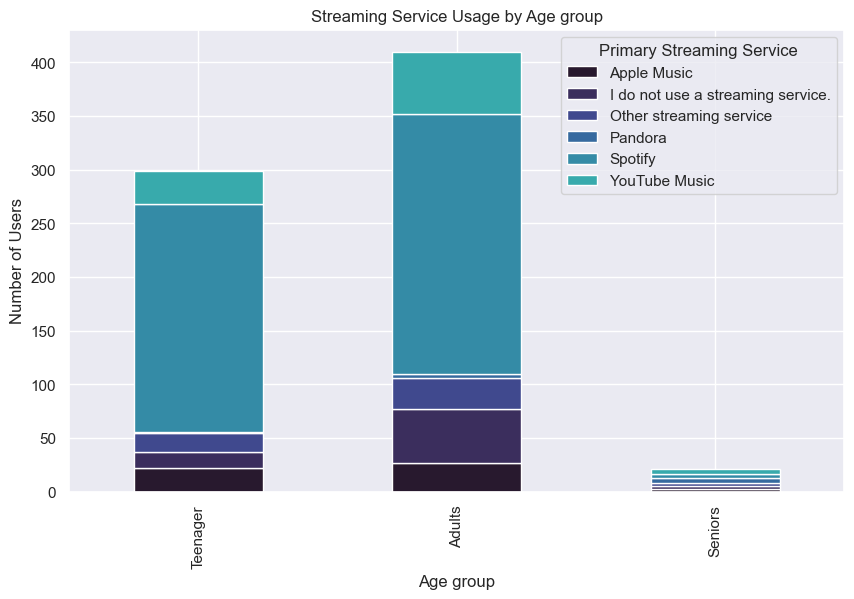

In [34]:
# Grouping the dataset by Age Group and Primary Streaming Service
age_service_counts = dff.groupby(['Age group', 'Primary streaming service']).size().unstack(fill_value=0)

# Display the result
print(age_service_counts)

# Optional: Visualize the result using a bar chart
import matplotlib.pyplot as plt

age_service_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Streaming Service Usage by Age group')
plt.xlabel('Age group')
plt.ylabel('Number of Users')
plt.legend(title='Primary Streaming Service')
plt.show()

In [41]:
stream = (dff.groupby('Age group')['Primary streaming service'].agg(['value_counts']).reset_index().rename(columns={'value_counts':'quantity'}))
stream

Age group          Primary streaming service  quantity
0   Teenager                            Spotify       212
1   Teenager                      YouTube Music        31
2   Teenager                        Apple Music        22
3   Teenager            Other streaming service        18
4   Teenager  I do not use a streaming service.        15
5   Teenager                            Pandora         1
6     Adults                            Spotify       242
7     Adults                      YouTube Music        58
8     Adults  I do not use a streaming service.        50
9     Adults            Other streaming service        29
10    Adults                        Apple Music        27
11    Adults                            Pandora         4
12   Seniors                            Pandora         5
13   Seniors                      YouTube Music         5
14   Seniors  I do not use a streaming service.         3
15   Seniors            Other streaming service         3
16   Seniors                            Spotify         3
17   Seniors                        Apple Music         2

In [50]:
Teenagers = pd.DataFrame(stream.query('`Age group` == "Teenager"'))
Adults = pd.DataFrame(stream.query('`Age group` == "Adults"'))
Seniors = pd.DataFrame(stream.query('`Age group` == "Seniors"'))

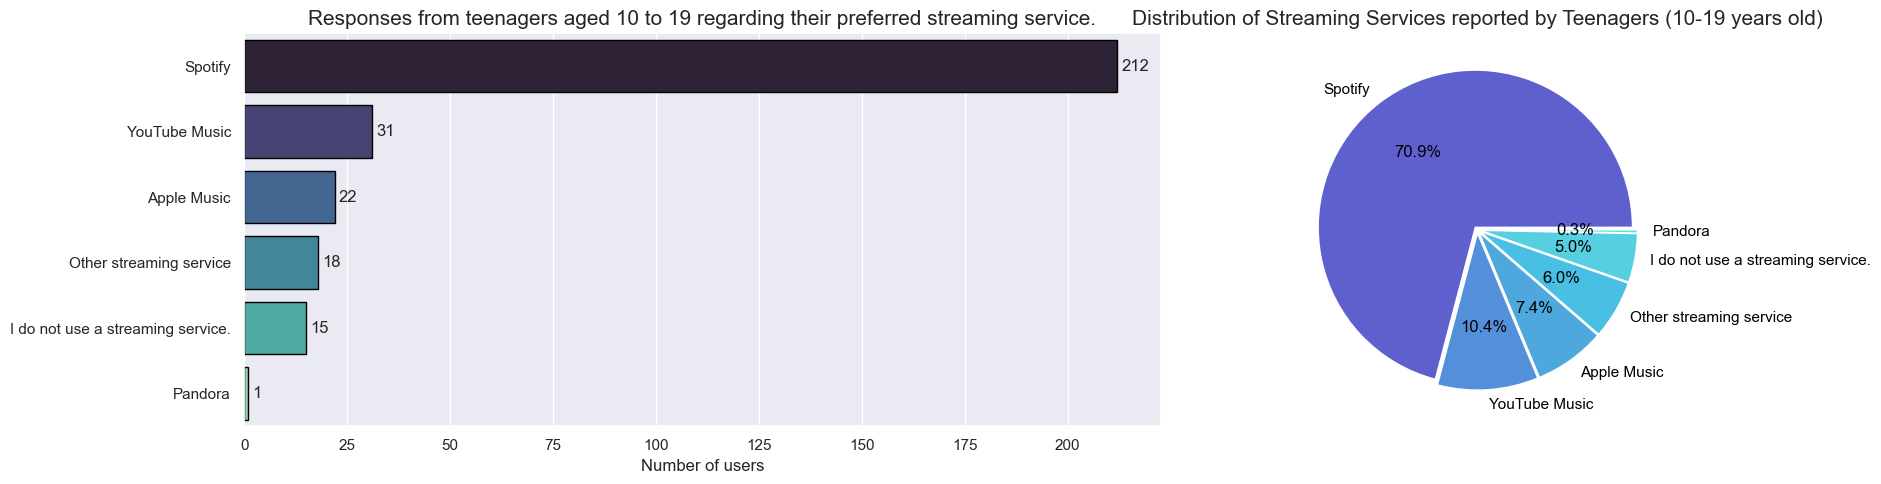

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(
    x='quantity', 
    y='Primary streaming service',
    data=Teenagers, 
    edgecolor='black', 
    palette='mako',
    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
ax1.set_title('Responses from teenagers aged 10 to 19 regarding their preferred streaming service.', fontsize=15)
ax1.set_xlabel('Number of users', fontsize=12)
ax1.set_ylabel('')
quantity = list(Teenagers['quantity'].values)
services = list(Teenagers['Primary streaming service'].values)
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3', '#56cfe1','#64dfdf']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
wedges, texts, autotexts = ax2.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax2.set_title('Distribution of Streaming Services reported by Teenagers (10-19 years old)', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')
plt.tight_layout()
plt.show()

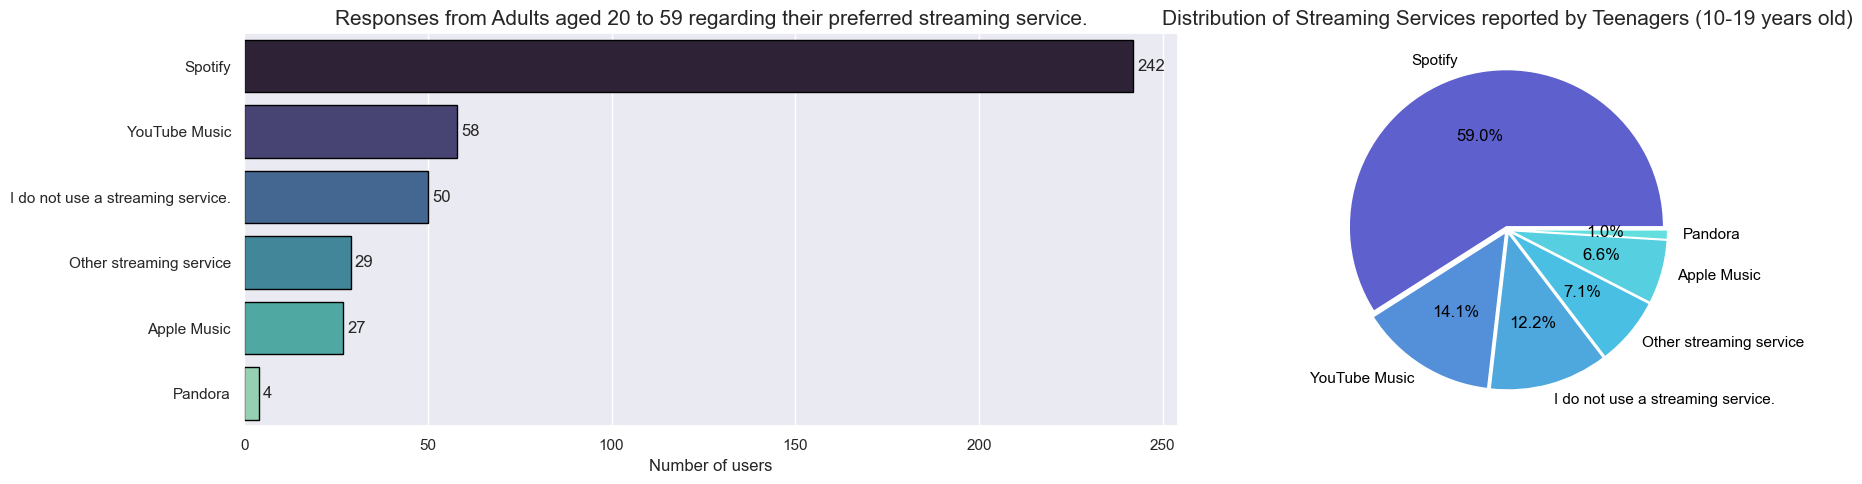

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(
    x='quantity', 
    y='Primary streaming service',
    data=Adults, 
    edgecolor='black', 
    palette='mako',
    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
ax1.set_title('Responses from Adults aged 20 to 59 regarding their preferred streaming service.', fontsize=15)
ax1.set_xlabel('Number of users', fontsize=12)
ax1.set_ylabel('')
quantity = list(Adults['quantity'].values)
services = list(Adults['Primary streaming service'].values)
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3', '#56cfe1','#64dfdf']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
wedges, texts, autotexts = ax2.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax2.set_title('Distribution of Streaming Services reported by Teenagers (10-19 years old)', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')
plt.tight_layout()
plt.show()

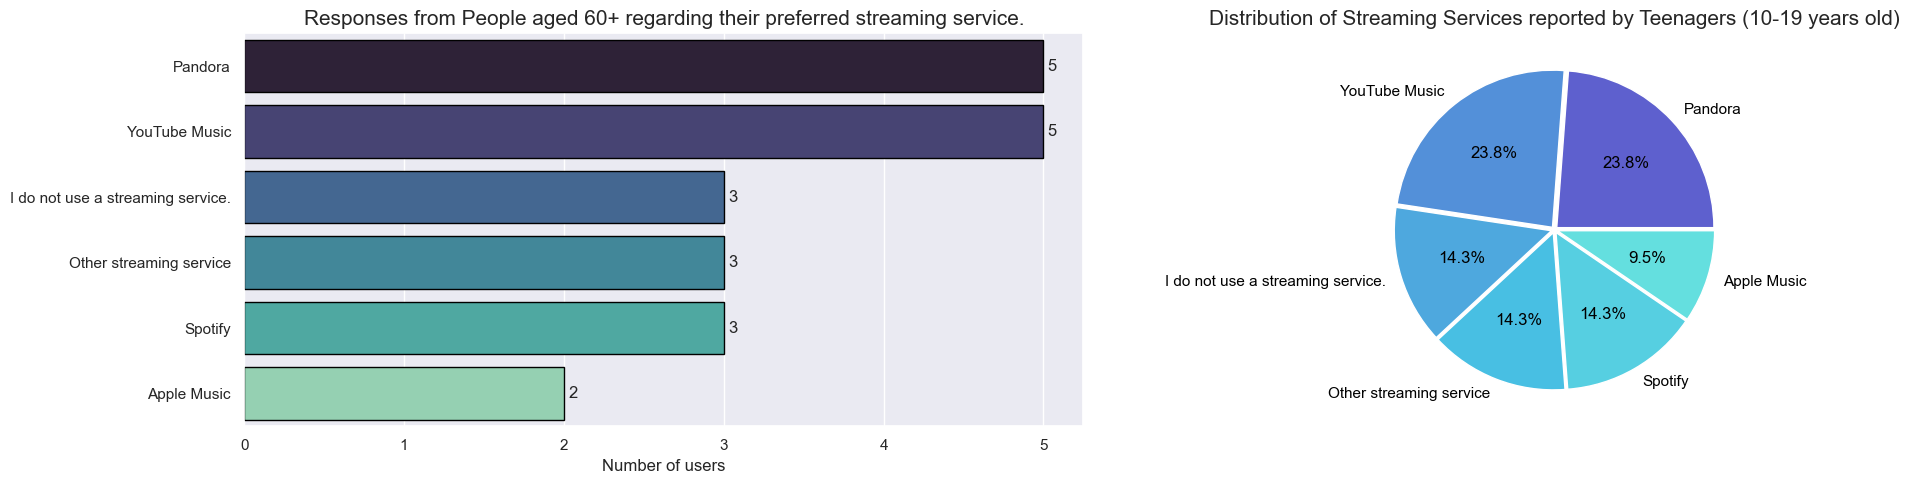

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(
    x='quantity', 
    y='Primary streaming service',
    data=Seniors, 
    edgecolor='black', 
    palette='mako',
    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
ax1.set_title('Responses from People aged 60+ regarding their preferred streaming service.', fontsize=15)
ax1.set_xlabel('Number of users', fontsize=12)
ax1.set_ylabel('')
quantity = list(Seniors['quantity'].values)
services = list(Seniors['Primary streaming service'].values)
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3', '#56cfe1','#64dfdf']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
wedges, texts, autotexts = ax2.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax2.set_title('Distribution of Streaming Services reported by Teenagers (10-19 years old)', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')
plt.tight_layout()
plt.show()

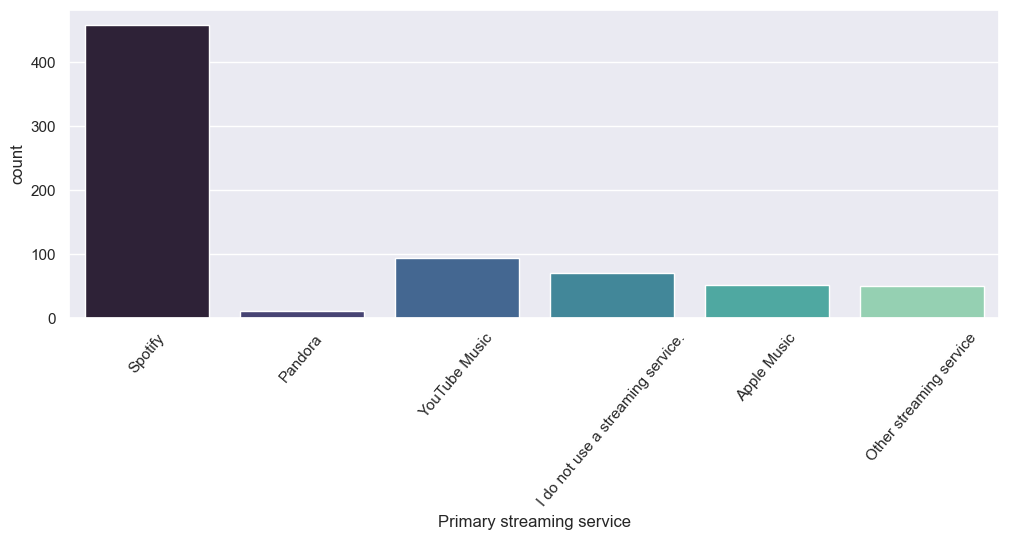

In [55]:
ww = dff["Primary streaming service"]
plt.figure(figsize=(12, 4))
plt.xticks(rotation=50)
sns.countplot(x=ww,palette='mako')
plt.show()

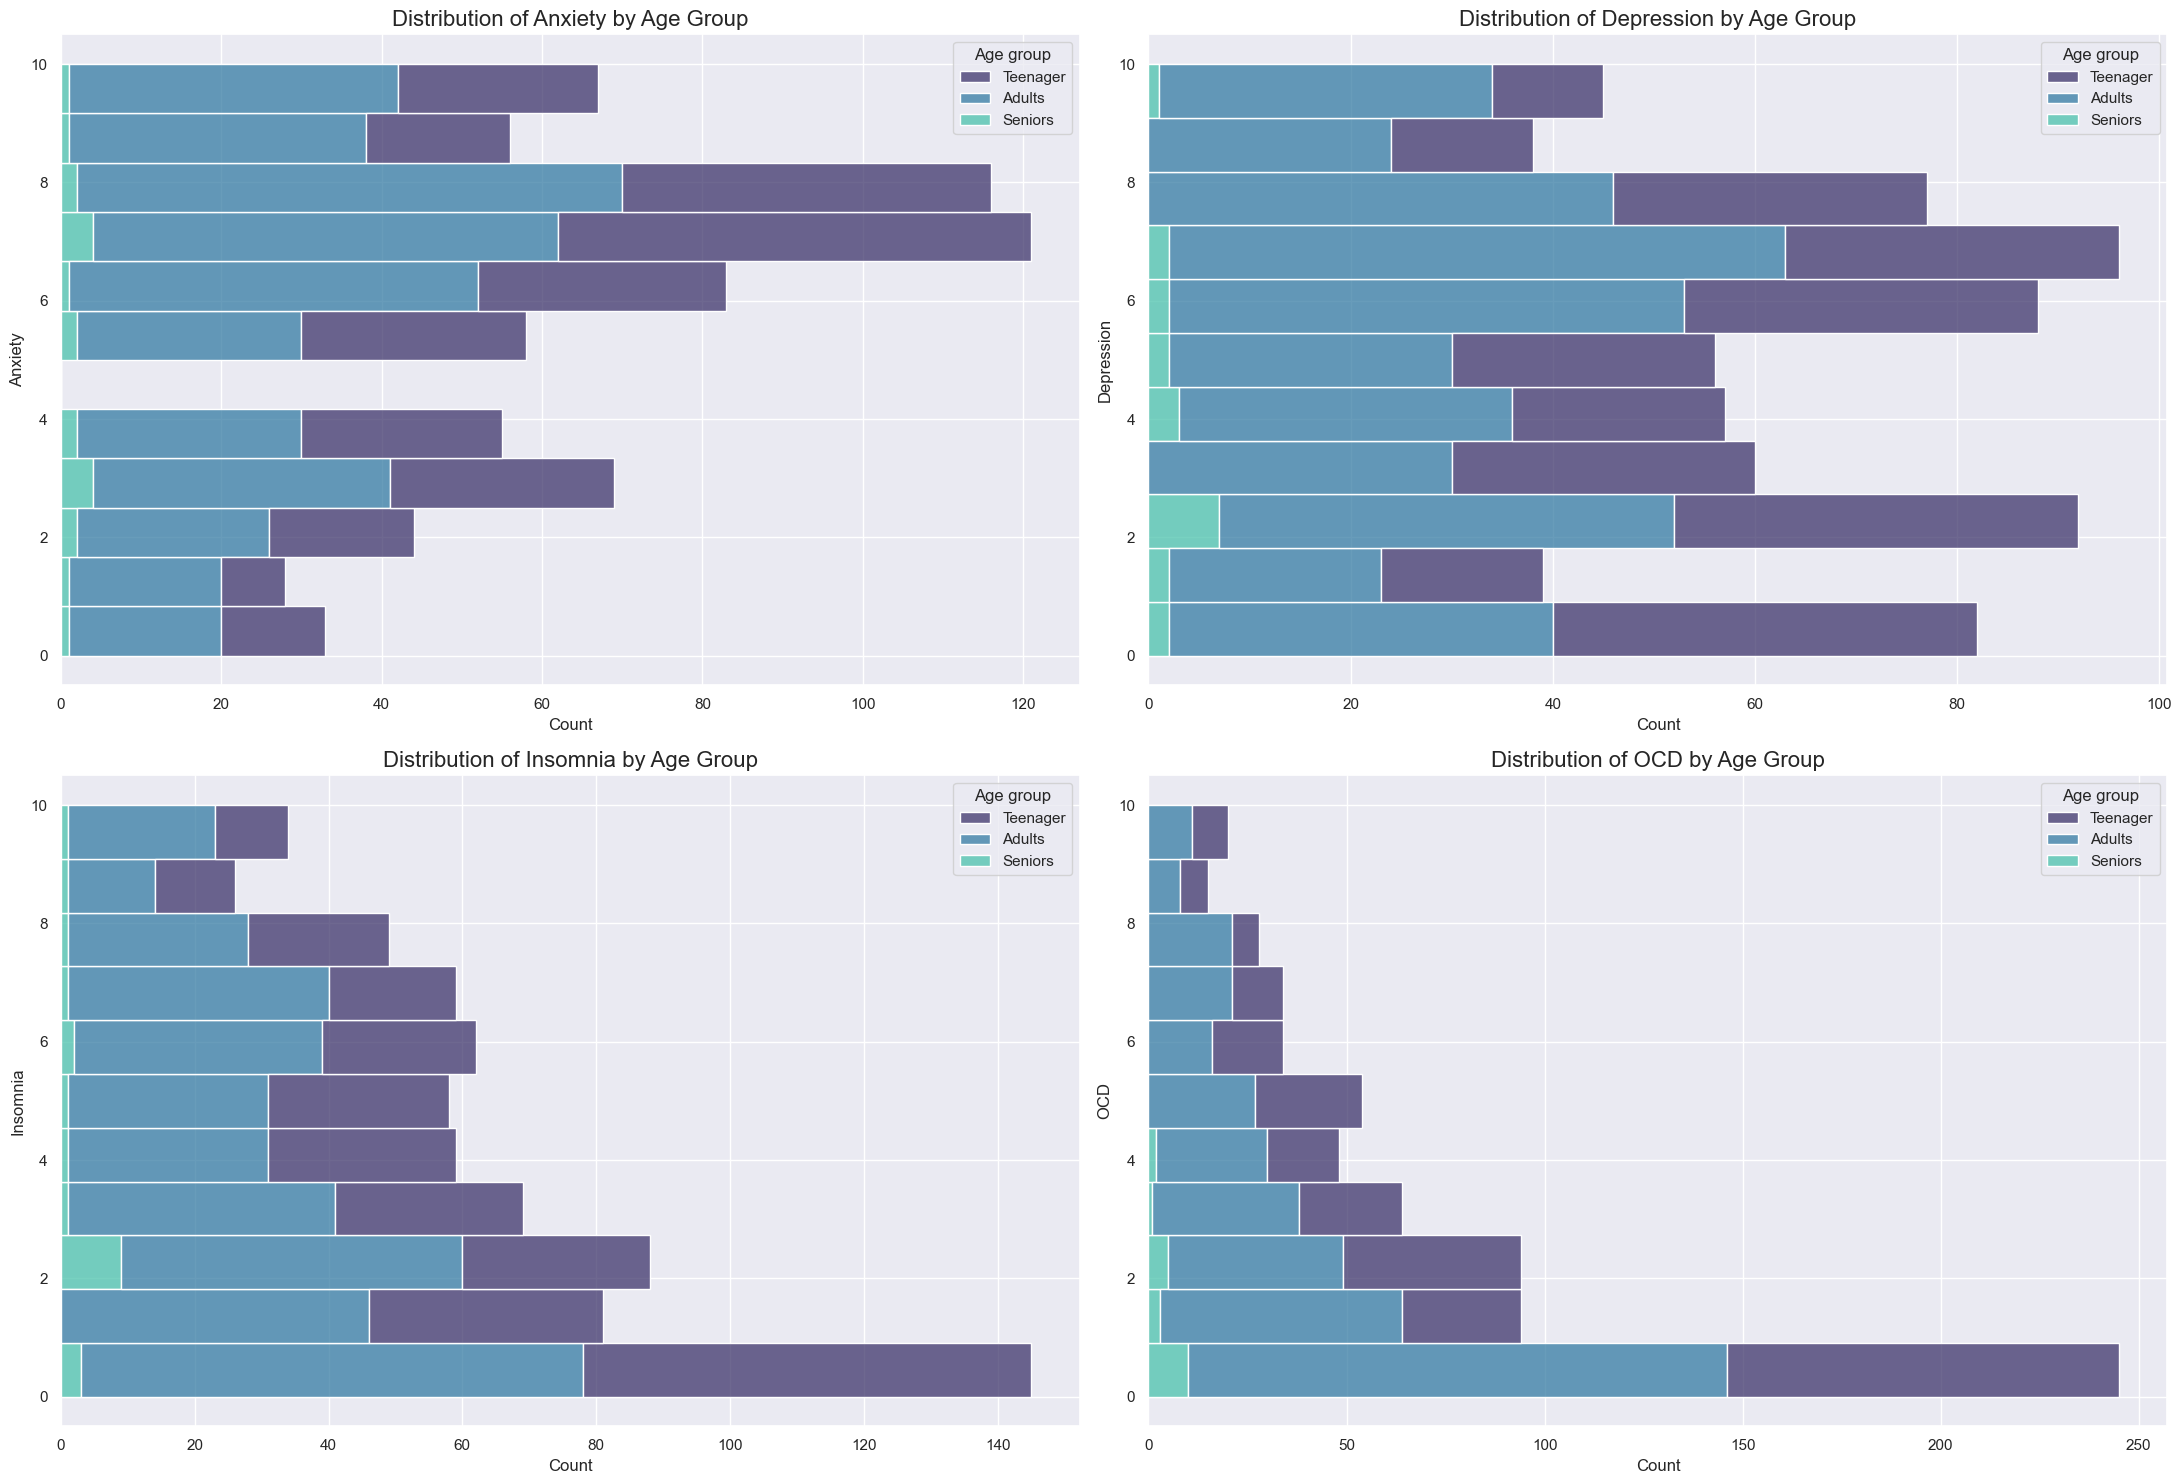

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dff' is your DataFrame and has the required columns
mental_disorders = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
age_groups = ['Teenager', 'Adults', 'Seniors']

# Create a figure with subplots for each mental disorder
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))  # Adjust the number of rows and columns as needed

for idx, disorder in enumerate(mental_disorders):
    ax = axes[idx // 2, idx % 2]  # Determine the position of the subplot
    sns.histplot(
        dff,
        y=disorder,
        hue='Age group',
        multiple='stack',
        palette='mako',
        ax=ax
    )
    ax.set_title(f'Distribution of {disorder} by Age Group', fontsize=16)
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel(disorder, fontsize=12)

plt.tight_layout()
plt.show()


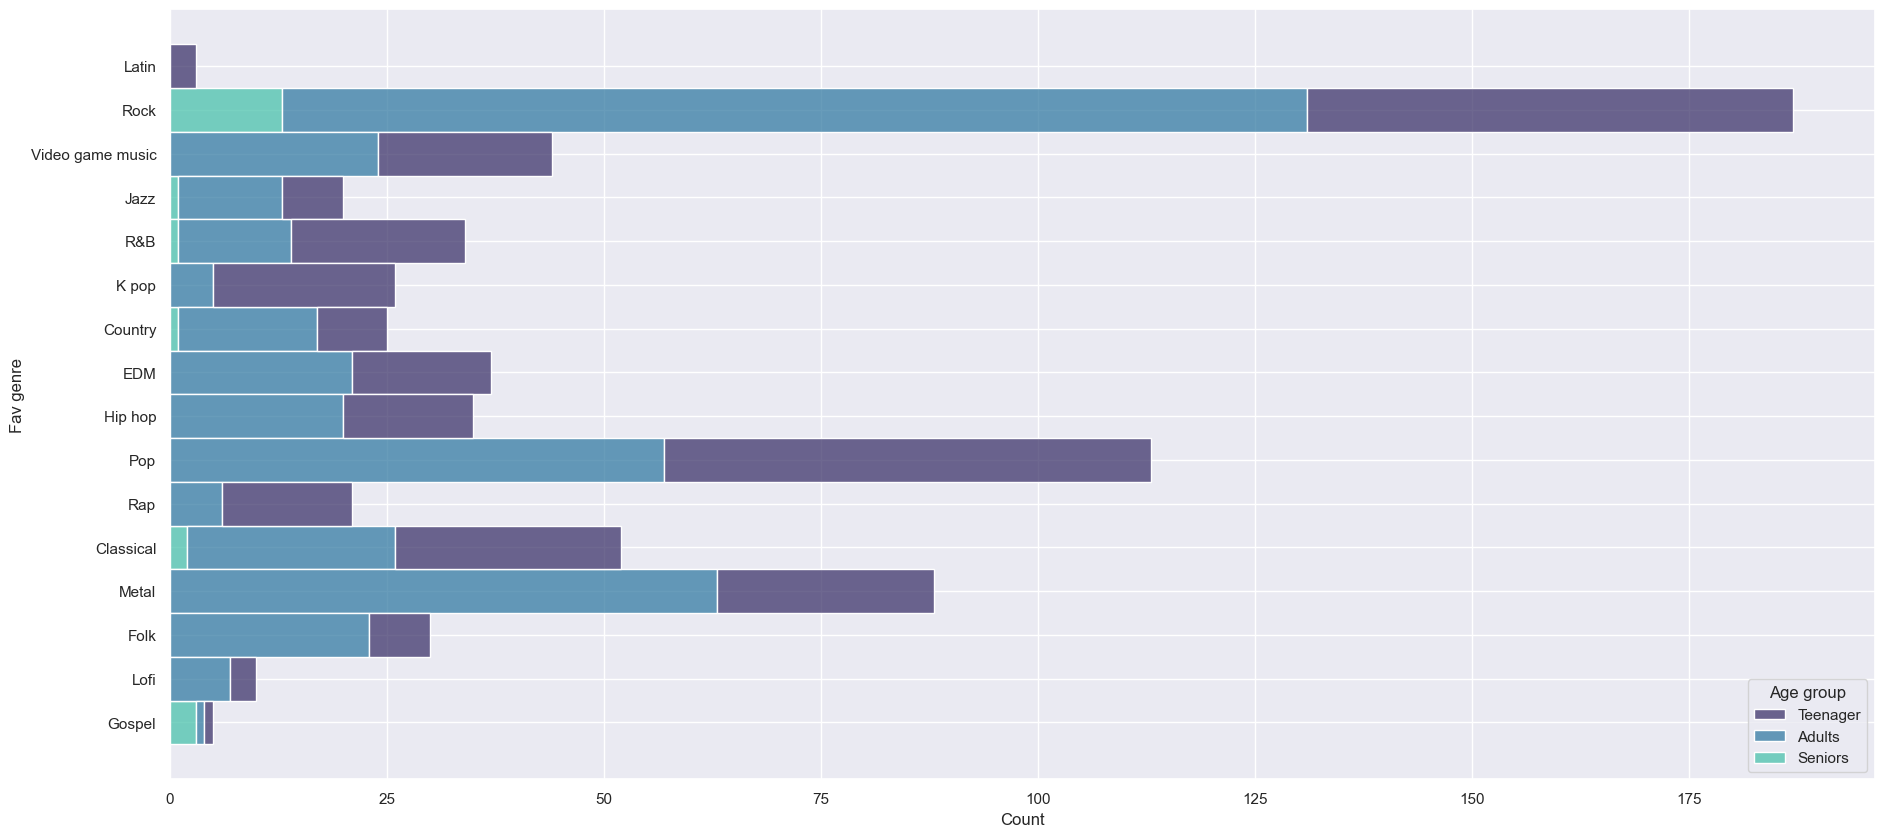

In [57]:
plt.figure(figsize=(22, 10))
sns.histplot(dff, y="Fav genre",palette='mako',hue="Age group", multiple="stack")
plt.show()

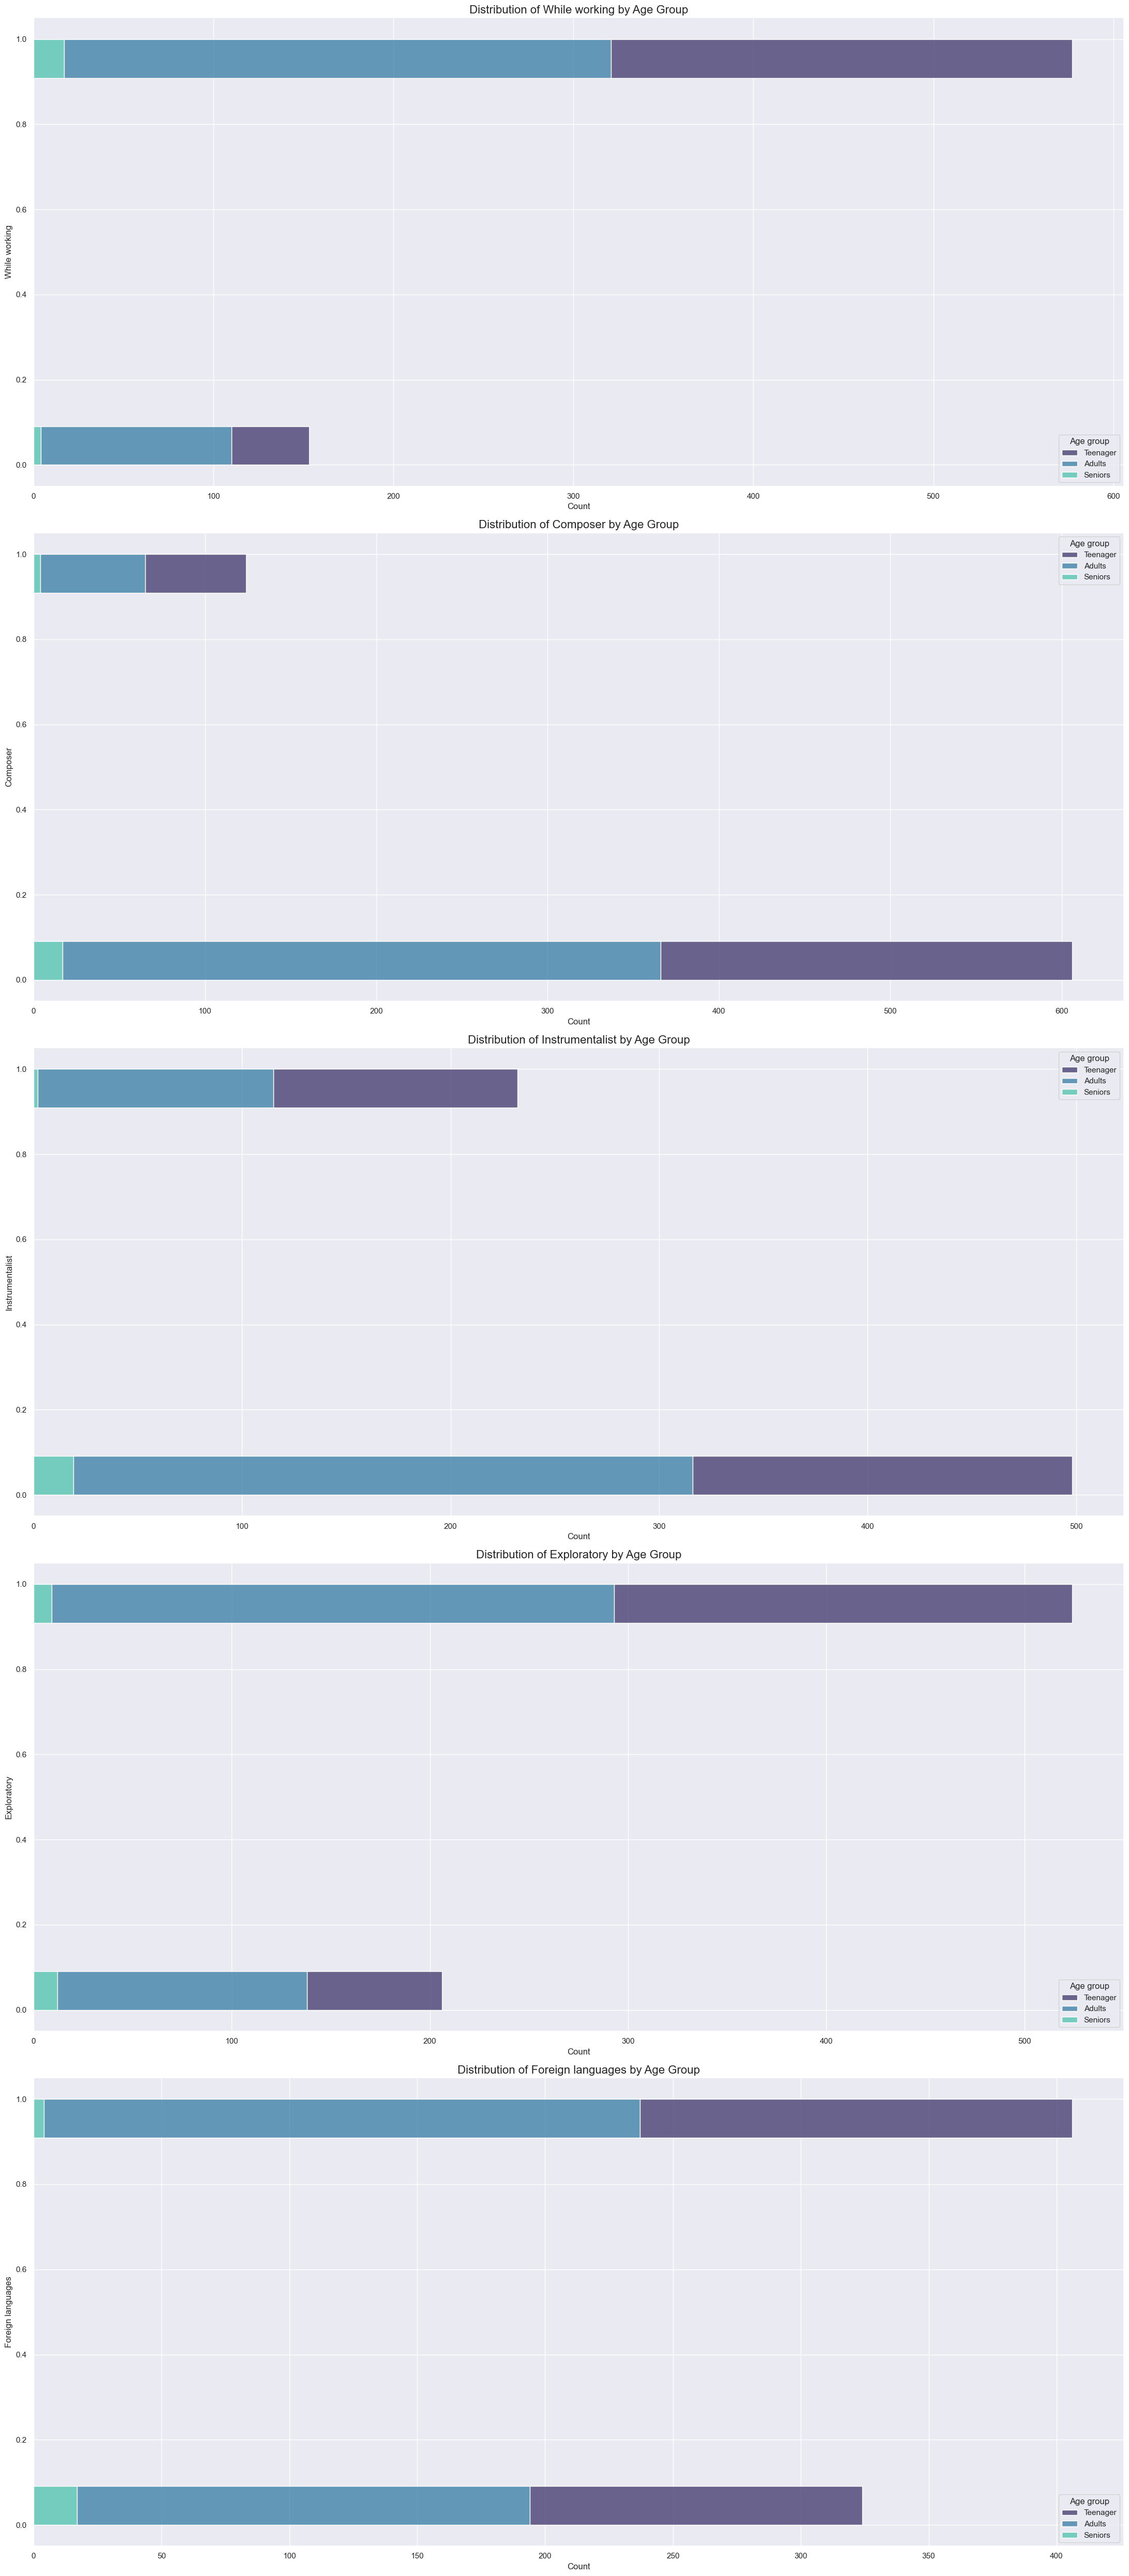

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to be plotted
columns_to_plot = ["While working", "Composer", "Instrumentalist", "Exploratory", "Foreign languages"]

# Create a figure with subplots for each specified column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(22, 10 * len(columns_to_plot)))  # Adjust size for better spacing

for ax, column in zip(axes, columns_to_plot):
    sns.histplot(
        dff,
        y=column,
        palette='mako',
        hue="Age group",
        multiple="stack",
        ax=ax
    )
    ax.set_title(f'Distribution of {column} by Age Group', fontsize=16)
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


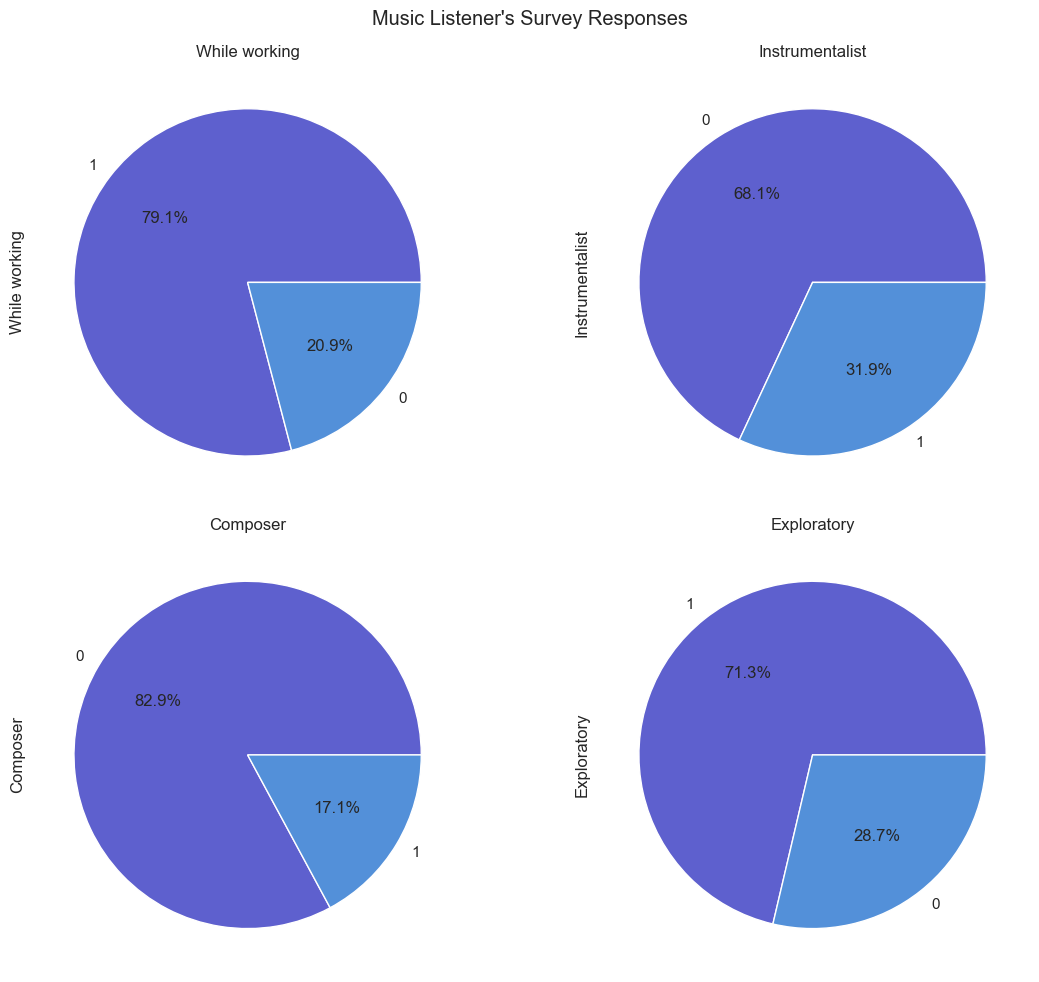

In [59]:
fig, ax = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)
colors = ['#5e60ce', '#5390d9'] 
df['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 0], colors=colors, title='While working')
df['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 1], colors=colors, title='Instrumentalist')
df['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 0], colors=colors, title='Composer')
df['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 1], colors=colors, title='Exploratory')
plt.suptitle("Music Listener's Survey Responses")
plt.tight_layout()
plt.show()

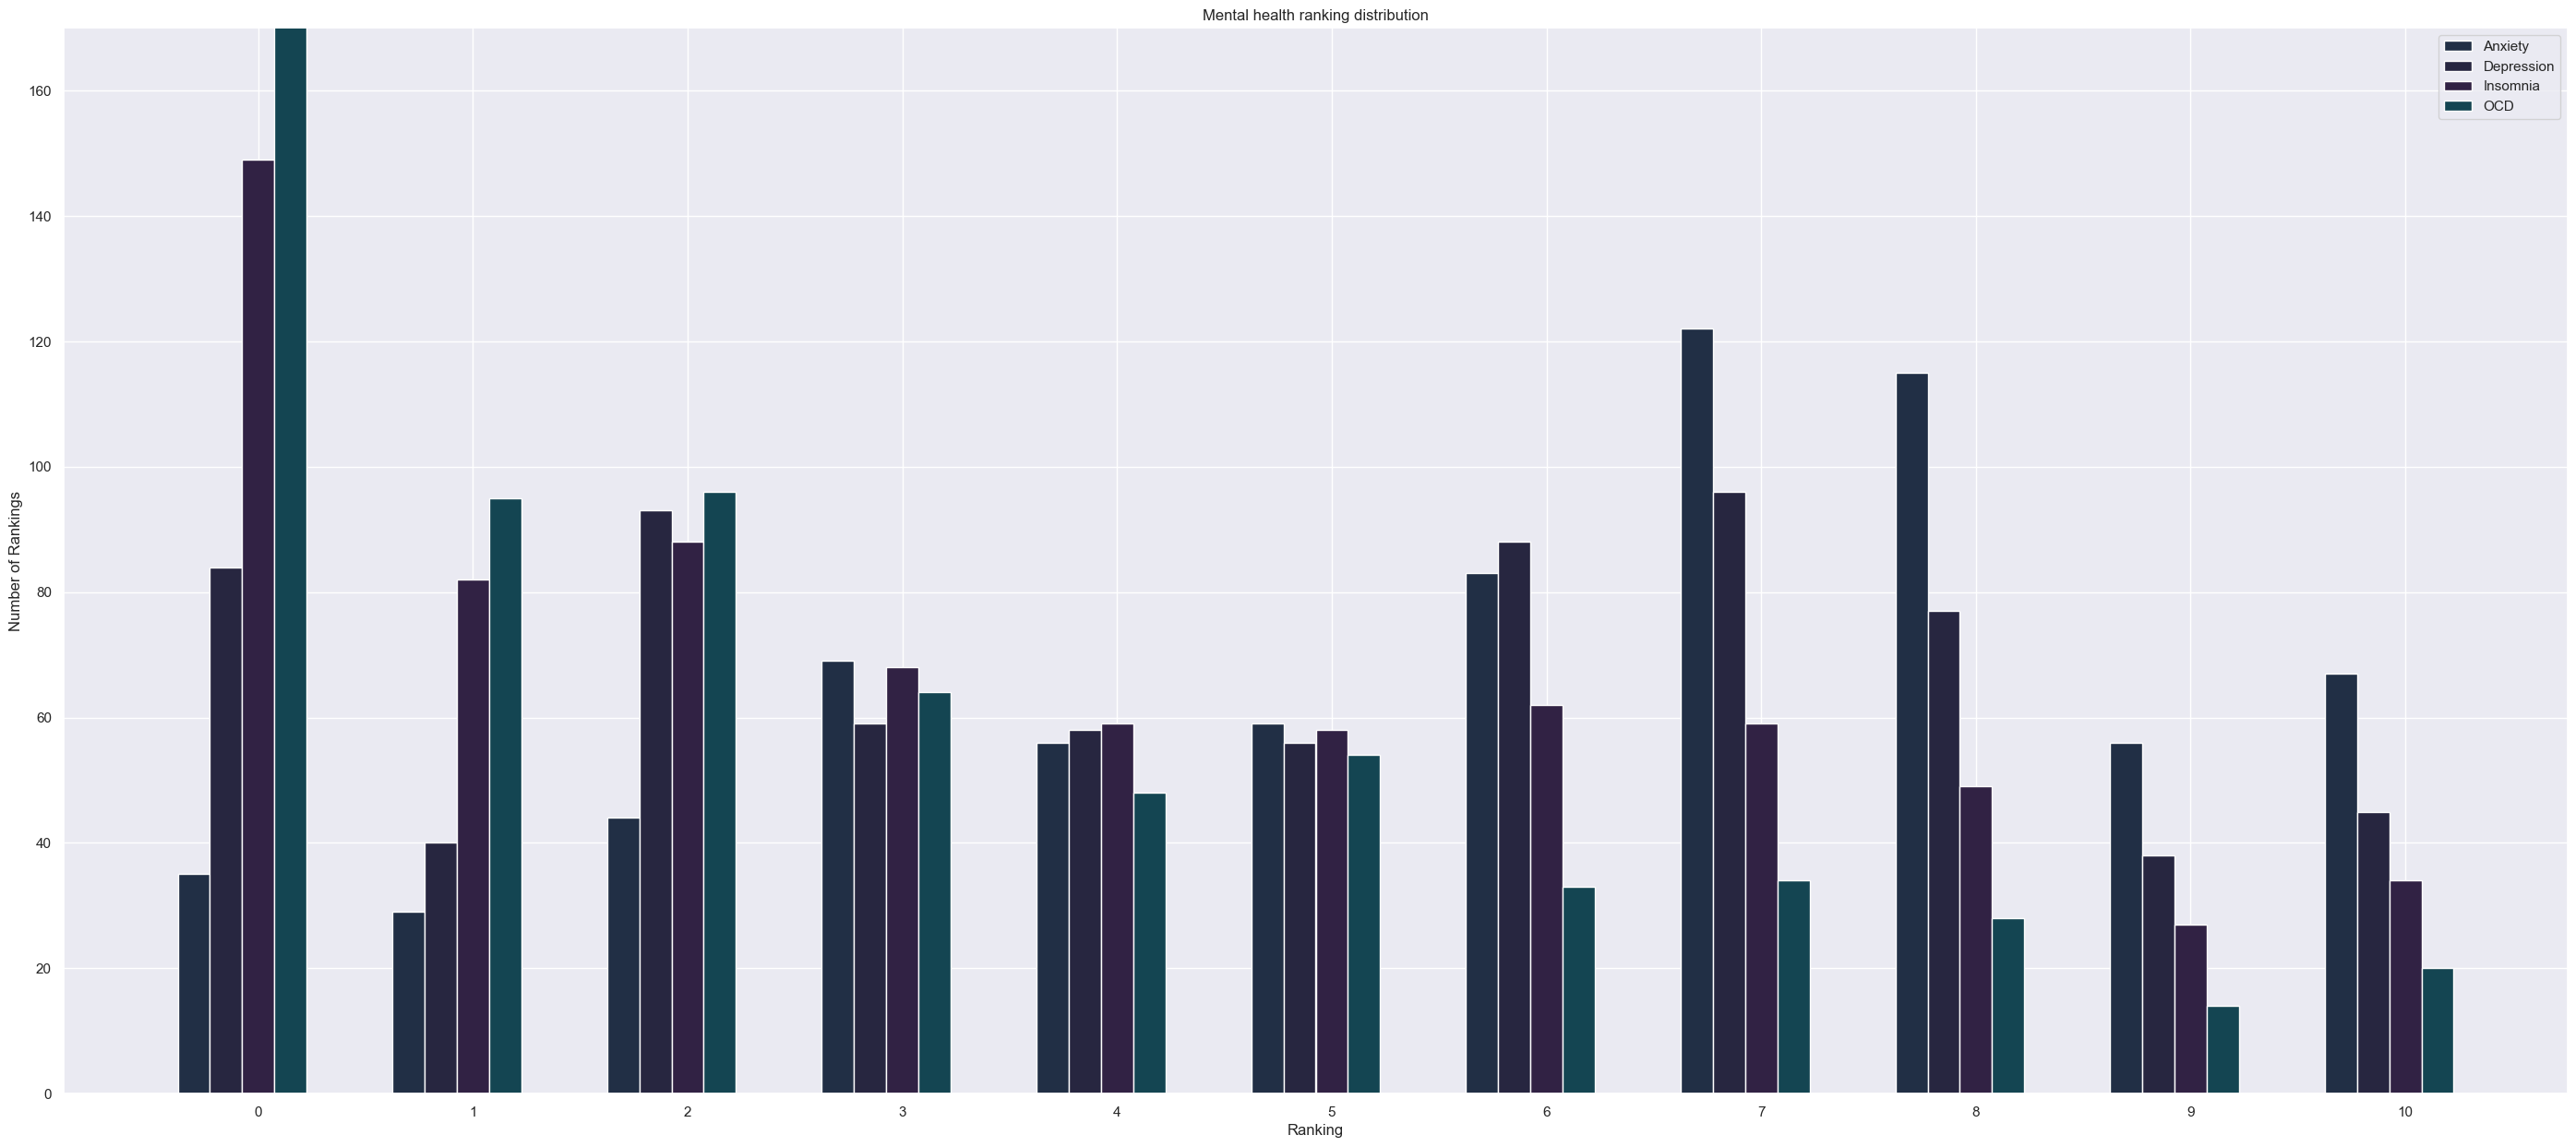

In [60]:
mentalsss = ["Anxiety", "Depression", "Insomnia", "OCD"]
mental = df[mentalsss]
mental.round(0).astype(int)
disorder_count = []
for disorder in mentalsss:
    x=0
    while x !=11:
        count =  (mental[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1
labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15
fig, ax = plt.subplots(figsize=(35, 15))
o = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = '#212F45')
oo = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = '#272640')
oo = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = '#312244')
oo = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = '#144552')
ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()
plt.show()

In [64]:
colors = ['#006466', '#065A60', '#0B525B', '#144552','#1B3A4B', '#212F45', '#272640', '#312244','#3E1F47', '#4D194D']
fig = px.pie(dff, names='Fav genre', title='Genre Preferences',color_discrete_sequence=colors)
fig.show()

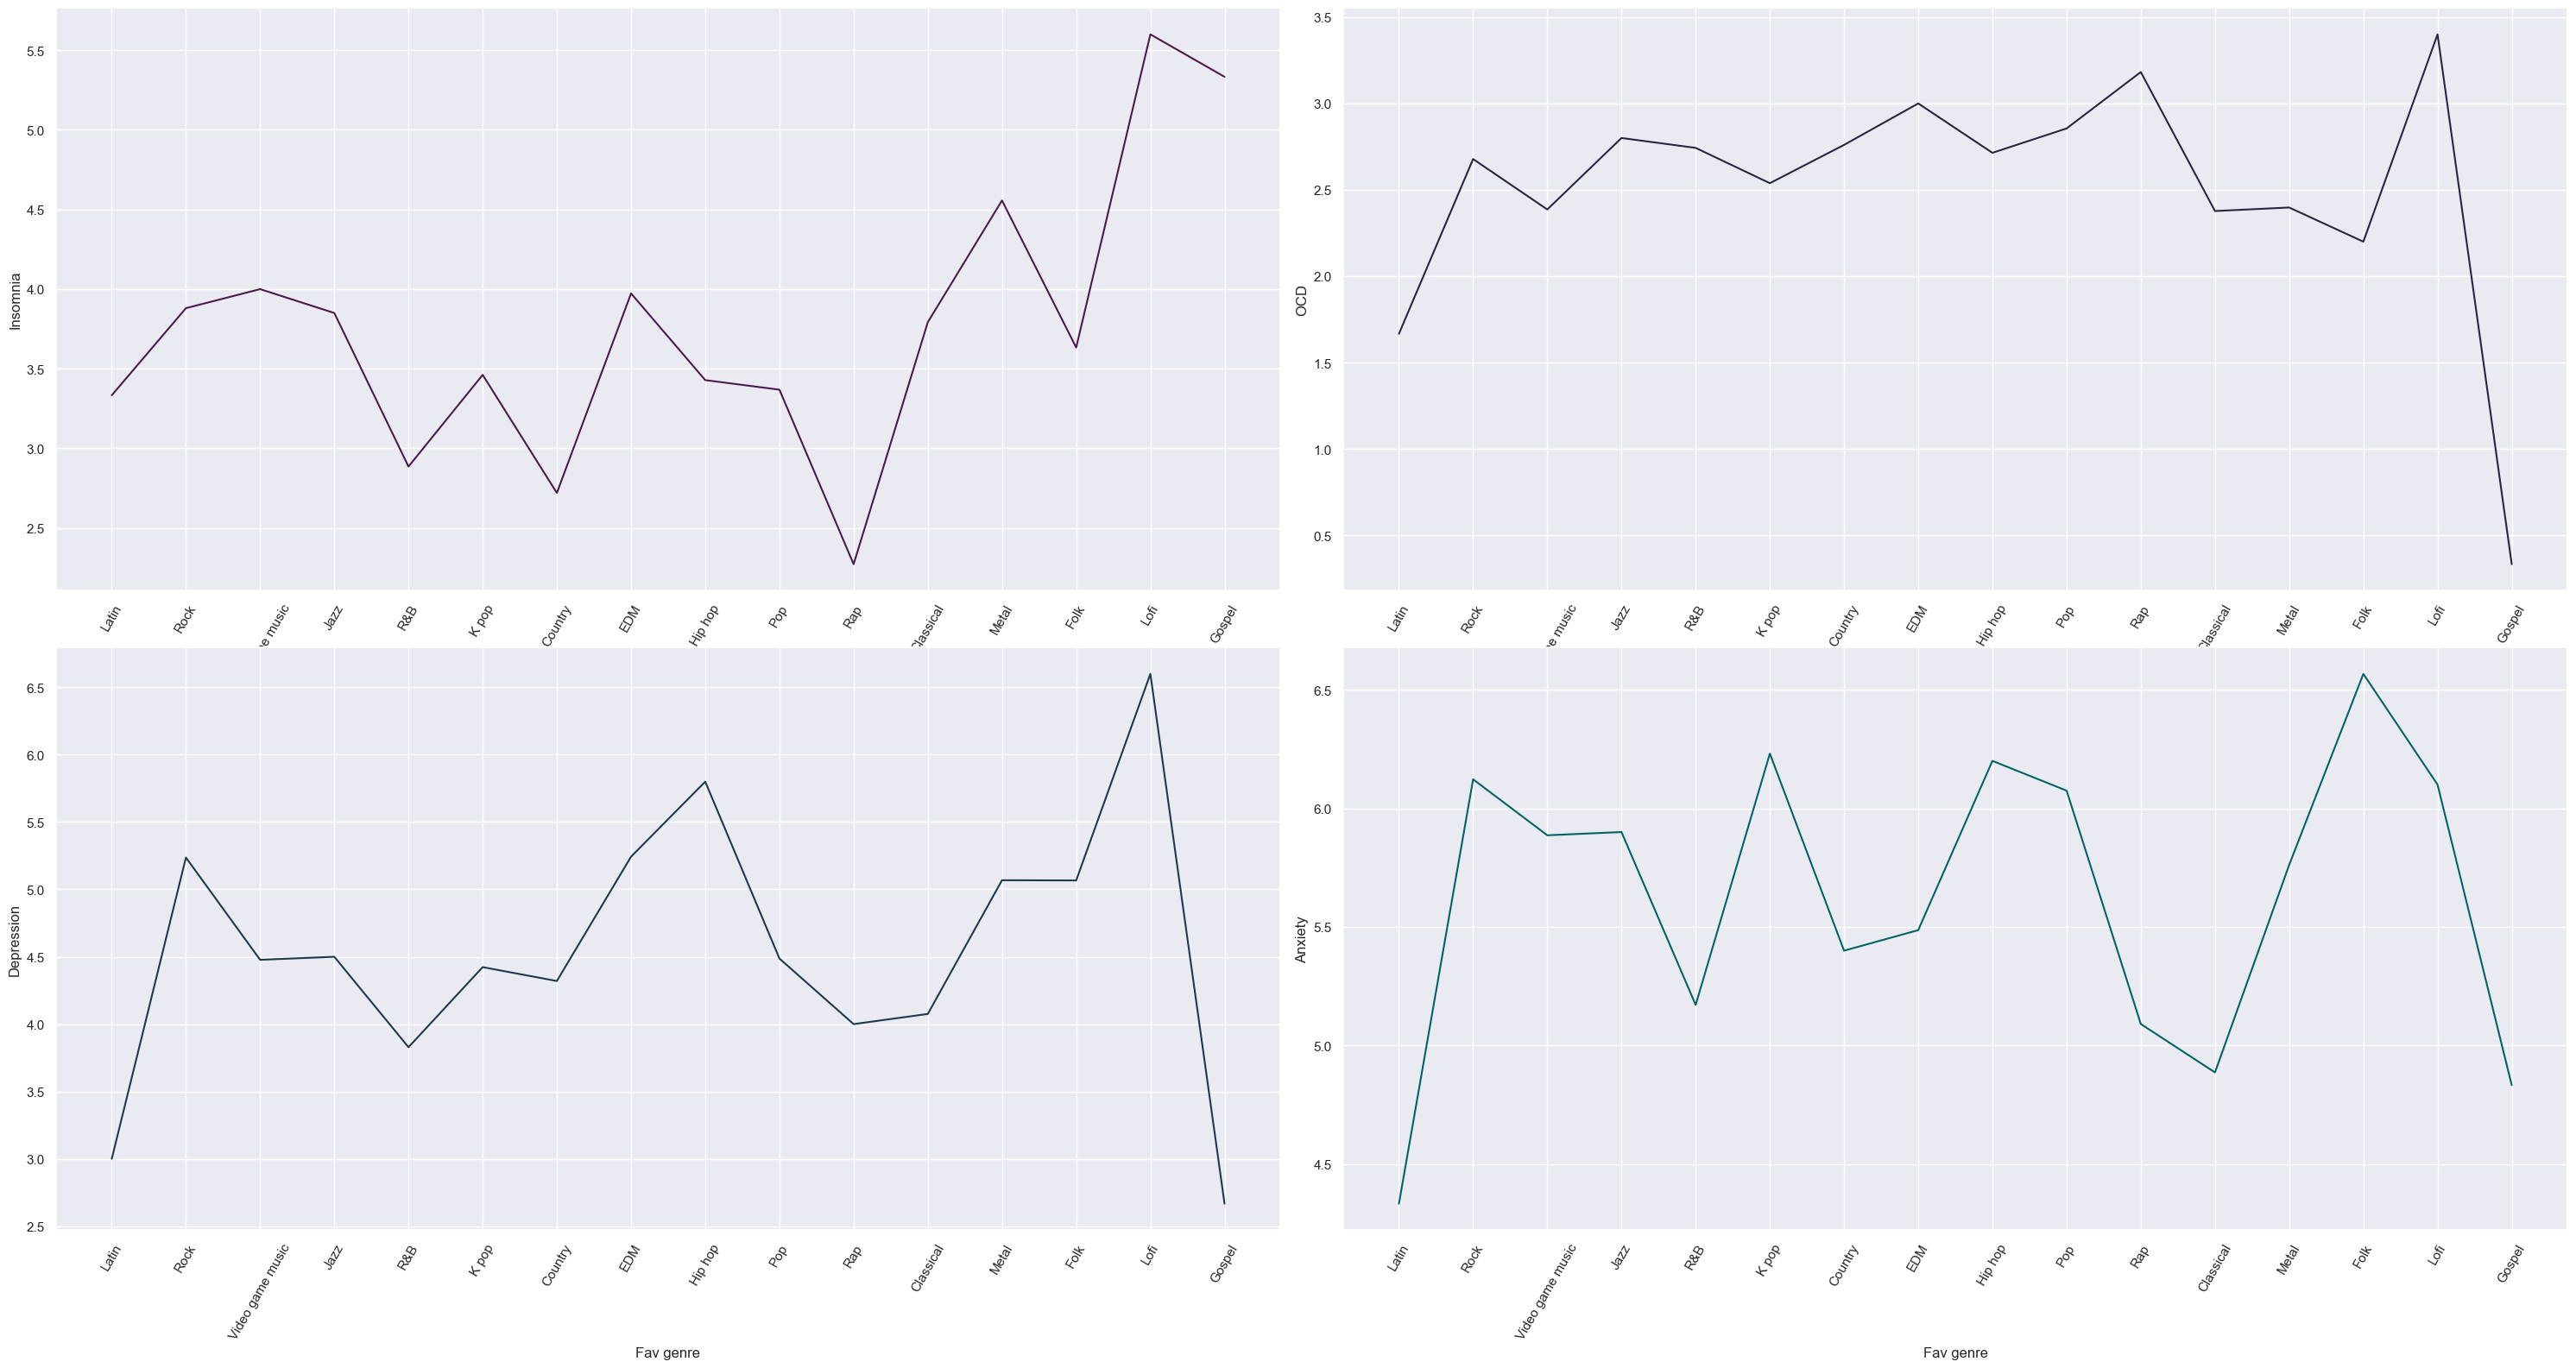

In [69]:
figure,axes=plt.subplots(2,2,figsize=(30,15))
sns.lineplot(ax=axes[0,0],x=dff['Fav genre'],y=dff['Insomnia'],ci=None,color='#4D194D')
sns.lineplot(ax=axes[0,1],x=dff['Fav genre'],y=dff['OCD'],ci=None,color='#272640')
sns.lineplot(ax=axes[1,0],x=dff['Fav genre'],y=dff['Depression'],ci=None,color='#1B3A4B')
sns.lineplot(ax=axes[1,1],x=dff['Fav genre'],y=dff['Anxiety'],ci=None,color='#006466')
plt.tight_layout()
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [70]:
colors = ['#312244', '#212F45', '#144552', '#006466']
fig = px.sunburst(dff, path=["Fav genre"], values="Hours per day", color="Music effects",color_discrete_sequence=colors)
total = dff["Hours per day"].sum()
fig.update_traces(textinfo="label+percent entry")
fig.update_layout(
    title="Top Fav Genre VS Hours per day",
    title_font={"size": 20},
    margin=dict(t=50, b=50, l=0, r=0))
fig.update_layout(width=1000, height=800)
fig.show()

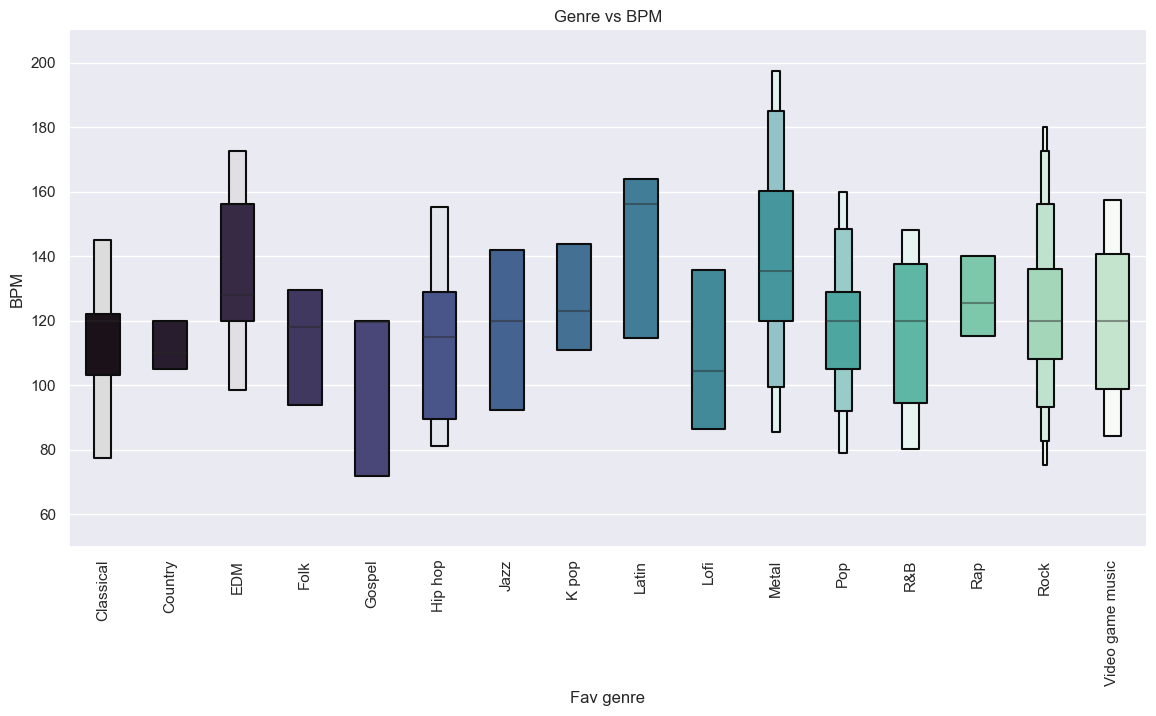

In [71]:
sns.catplot(
    data=dff.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",height=6, aspect=2,width = 0.5,showfliers=False, palette='mako')
plt.xticks(rotation = 90)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

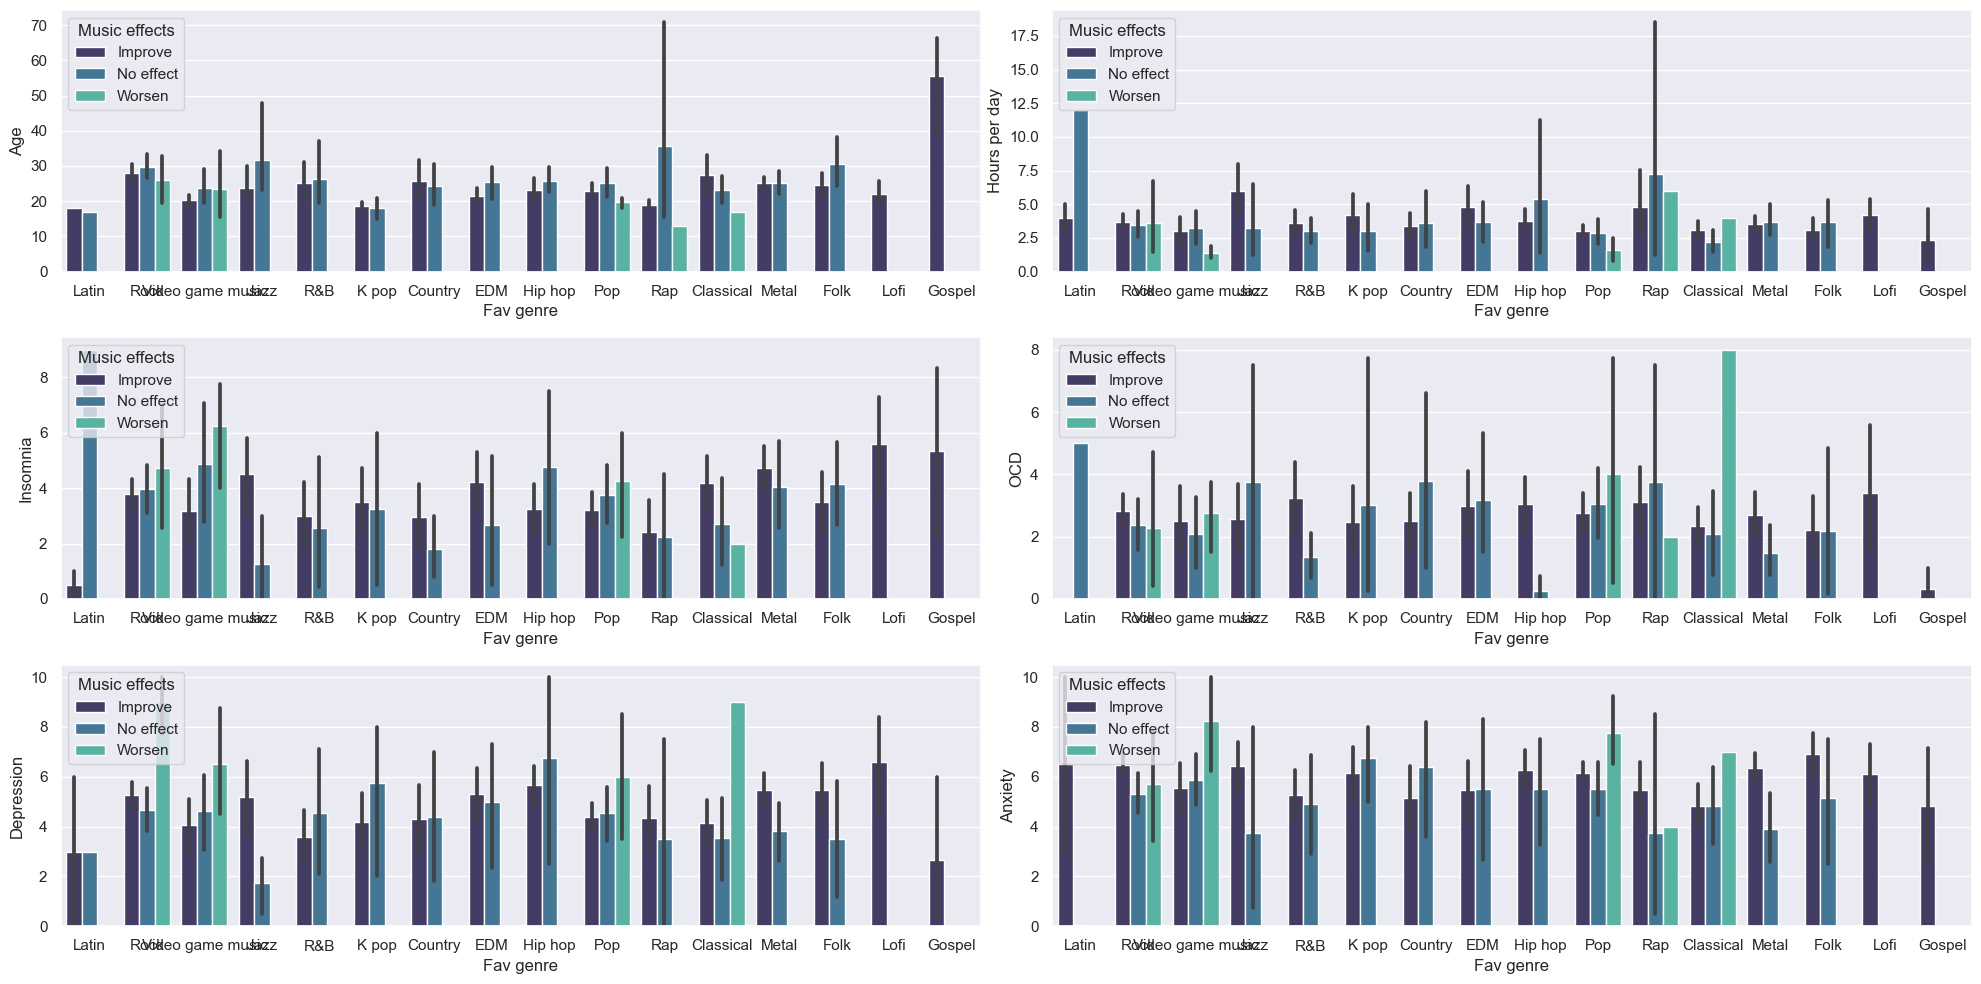

In [72]:
figure,axes=plt.subplots(3,2,figsize=(20,10))
sns.barplot(ax=axes[0,0],x=dff['Fav genre'],y=dff['Age'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[0,1],x=dff['Fav genre'],y=dff['Hours per day'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[1,0],x=dff['Fav genre'],y=dff['Insomnia'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[1,1],x=dff['Fav genre'],y=dff['OCD'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[2,0],x=dff['Fav genre'],y=dff['Depression'],hue=dff['Music effects'],palette="mako")
sns.barplot(ax=axes[2,1],x=dff['Fav genre'],y=dff['Anxiety'],hue=dff['Music effects'],palette="mako")
plt.tight_layout()
plt.show()

In [75]:
import plotly.express as px

# Assuming your dataset is stored in a DataFrame named 'dff'
# and it contains the following columns: 'OCD', 'Insomnia', 'Depression', 'Anxiety'

fig = px.parallel_coordinates(dff, 
                              dimensions=['OCD', 'Insomnia', 'Depression', 'Anxiety'],
                              color="Anxiety",  # You can choose 'OCD', 'Depression', or any other
                              color_continuous_scale=[(0.00, "red"),   (0.33, "red"),
                                                      (0.33, "green"), (0.66, "green"),
                                                      (0.66, "blue"),  (1.00, "blue")])

fig.show()
